### Reading and Understanding the data

In [1]:
# Disabling Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [3]:
sns.set_palette('tab10')
sns.set_style('whitegrid')

In [4]:
# loading data dictionary for reference

data_dict = pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')
data_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [5]:
# Loading the dataset

tele_churn = pd.read_csv('telecom_churn_data.csv')

In [6]:
# Loading first five rows of the dataset

tele_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [7]:
# Looking at the number of rows and columns of the dataset

print("The dataset has {0} rows and {1} columns".format(tele_churn.shape[0], tele_churn.shape[1]))

The dataset has 99999 rows and 226 columns


In [8]:
# Looking at data types of various columns

tele_churn.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [9]:
# Looking at statistics of numeric columns

tele_churn.describe(percentiles = [.25, .50, .75, .90, .99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### Data Preparation

In [10]:
# Segregating columns basis data type

#1. Creating list of date columns

date_cols = [cols for cols in tele_churn.columns if tele_churn[cols].dtype == 'object']
print("Total date columns: {}".format(len(date_cols)))

#2. Creating list of customer ID columns

customer_id = ['mobile_number', 'circle_id']
print("Total customer ID columns: {}".format(len(customer_id)))

#3. Creating list numeric columns

num_col = [cols for cols in tele_churn.columns if cols not in date_cols + customer_id]
print("Total numeric columns: {}".format(len(num_col)))

Total date columns: 12
Total customer ID columns: 2
Total numeric columns: 212


In [11]:
tele_churn[date_cols].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


In [12]:
# Let's check values under date_cols

for i in tele_churn[date_cols]:
    print('\n' + i)
    print('-'*30)
    print(tele_churn[date_cols][i].value_counts(dropna = False)) # This will show us all the null values


last_date_of_month_6
------------------------------
6/30/2014    99999
Name: last_date_of_month_6, dtype: int64

last_date_of_month_7
------------------------------
7/31/2014    99398
NaN            601
Name: last_date_of_month_7, dtype: int64

last_date_of_month_8
------------------------------
8/31/2014    98899
NaN           1100
Name: last_date_of_month_8, dtype: int64

last_date_of_month_9
------------------------------
9/30/2014    98340
NaN           1659
Name: last_date_of_month_9, dtype: int64

date_of_last_rech_6
------------------------------
6/30/2014    16960
6/29/2014    12918
6/27/2014    11169
6/28/2014     9491
6/26/2014     5530
6/25/2014     4896
6/17/2014     4145
6/24/2014     4129
6/14/2014     3845
6/21/2014     3747
6/23/2014     2908
6/18/2014     2747
6/12/2014     2511
6/22/2014     2344
6/13/2014     2147
6/19/2014     2009
6/20/2014     1803
NaN           1607
6/16/2014     1126
6/15/2014      873
6/11/2014      579
6/8/2014       520
6/5/2014       327
6/

In [13]:
tele_churn[customer_id].head()

,mobile_number,circle_id
0,7000842753,109
1,7001865778,109
2,7001625959,109
3,7001204172,109
4,7000142493,109


In [14]:
tele_churn[num_col].head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,0.0,0.0,0.0,34.047,

In [15]:
# Accounting for any missing values:

null_col = tele_churn.isnull().mean()*100
null_col = null_col[null_col.values > 0]
null_col.sort_values(ascending = False)

count_rech_3g_6             74.846748
fb_user_6                   74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
night_pck_user_6            74.846748
av_rech_amt_data_6          74.846748
total_rech_data_6           74.846748
arpu_2g_6                   74.846748
max_rech_data_6             74.846748
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
count_rech_3g_7             74.428744
count_rech_2g_7             74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
arpu_2g_7                   74.428744
night_pck_user_7            74.428744
date_of_last_rech_data_7    74.428744
fb_user_7                   74.428744
total_rech_data_7           74.428744
total_rech_data_9           74.077741
count_rech_2g_9             74.077741
max_rech_data_9             74.077741
date_of_last_rech_data_9    74.077741
fb_user_9                   74.077741
count_rech_3g_9             74.077741
night_pck_us

In [16]:
# Let's filter out columns ending with data_6

month_rech_6_cols = [col for col in tele_churn.columns if "_data_6" in col]
month_rech_6_cols

['date_of_last_rech_data_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'av_rech_amt_data_6']

In [17]:
# For the 6th month, let's check recharge values of total/average/max when total_rech_data and date_of_last_rech_data is null 

tele_churn[tele_churn['total_rech_data_6'].isna() & tele_churn['date_of_last_rech_6'].isna()][month_rech_6_cols].head()

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
26,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN
187,NaN,NaN,NaN,NaN
198,NaN,NaN,NaN,NaN
232,NaN,NaN,NaN,NaN


In [18]:
# For the 6th month, let's check descriptive statistics

tele_churn[tele_churn['total_rech_data_6'].isna() & tele_churn['date_of_last_rech_6'].isna()][month_rech_6_cols].describe()

,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [19]:
# Let's filter out columns ending with data_7

month_rech_7_cols = [col for col in tele_churn.columns if "_data_7" in col]
month_rech_7_cols

['date_of_last_rech_data_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'av_rech_amt_data_7']

In [20]:
# For the 7th month, let's check recharge values of total/average/max when total_rech_data and date_of_last_rech_data is null 

tele_churn[tele_churn['total_rech_data_7'].isna() & tele_churn['date_of_last_rech_7'].isna()][month_rech_7_cols].head()

,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,av_rech_amt_data_7
52,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN
130,NaN,NaN,NaN,NaN
144,NaN,NaN,NaN,NaN


In [21]:
# For the 7th month, let's check descriptive statistics

tele_churn[tele_churn['total_rech_data_7'].isna() & tele_churn['date_of_last_rech_7'].isna()][month_rech_7_cols].describe()

,total_rech_data_7,max_rech_data_7,av_rech_amt_data_7
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [22]:
# Let's filter out columns ending with data_8

month_rech_8_cols = [col for col in tele_churn.columns if "_data_8" in col]
month_rech_8_cols

['date_of_last_rech_data_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'av_rech_amt_data_8']

In [23]:
# For the 6th month, let's check recharge values of total/average/max when total_rech_data and date_of_last_rech_data is null 

tele_churn[tele_churn['total_rech_data_8'].isna() & tele_churn['date_of_last_rech_8'].isna()][month_rech_8_cols].head()

,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8
121,NaN,NaN,NaN,NaN
144,NaN,NaN,NaN,NaN
152,NaN,NaN,NaN,NaN
161,NaN,NaN,NaN,NaN
188,NaN,NaN,NaN,NaN


In [24]:
# For the 8th month, let's check descriptive statistics

tele_churn[tele_churn['total_rech_data_8'].isna() & tele_churn['date_of_last_rech_8'].isna()][month_rech_8_cols].describe()

,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [25]:
# Let's filter out columns ending with data_9

month_rech_9_cols = [col for col in tele_churn.columns if "_data_9" in col]
month_rech_9_cols

['date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9']

In [26]:
# For the 9th month, let's check recharge values of total/average/max when total_rech_data and date_of_last_rech_data is null 

tele_churn[tele_churn['total_rech_data_9'].isna() & tele_churn['date_of_last_rech_9'].isna()][month_rech_9_cols].head()

,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_9,av_rech_amt_data_9
11,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN
144,NaN,NaN,NaN,NaN


In [27]:
# For the 9th month, let's check descriptive statistics

tele_churn[tele_churn['total_rech_data_9'].isna() & tele_churn['date_of_last_rech_9'].isna()][month_rech_9_cols].describe()

,total_rech_data_9,max_rech_data_9,av_rech_amt_data_9
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [28]:
# These are meaningfully missing and hence we will impute data for four months with 0 (6,7,8,9 month)

zero_impute_cols = month_rech_6_cols + month_rech_7_cols + month_rech_8_cols + month_rech_9_cols
zero_impute_cols

['date_of_last_rech_data_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'av_rech_amt_data_6',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'av_rech_amt_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'av_rech_amt_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9']

In [29]:
del zero_impute_cols[::4] # removing all the date_of_last_rech_ columns from the list
zero_impute_cols

['total_rech_data_6',
 'max_rech_data_6',
 'av_rech_amt_data_6',
 'total_rech_data_7',
 'max_rech_data_7',
 'av_rech_amt_data_7',
 'total_rech_data_8',
 'max_rech_data_8',
 'av_rech_amt_data_8',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9']

In [30]:
# Imputing through lambda function

tele_churn[zero_impute_cols] = tele_churn[zero_impute_cols].apply(lambda x : x.fillna(0))

In [31]:
# Confirming imputation

tele_churn[zero_impute_cols].isnull().mean()*100

total_rech_data_6     0.0
max_rech_data_6       0.0
av_rech_amt_data_6    0.0
total_rech_data_7     0.0
max_rech_data_7       0.0
av_rech_amt_data_7    0.0
total_rech_data_8     0.0
max_rech_data_8       0.0
av_rech_amt_data_8    0.0
total_rech_data_9     0.0
max_rech_data_9       0.0
av_rech_amt_data_9    0.0
dtype: float64

In [32]:
# Dropping customer_id and date_cols list of columns because we do not need them for analysis purpose

tele_churn = tele_churn.drop(customer_id + date_cols, axis =1)

# Taking stock of updated dataframe
tele_churn.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 212 columns):
 #   Column              Dtype  
---  ------              -----  
 0   loc_og_t2o_mou      float64
 1   std_og_t2o_mou      float64
 2   loc_ic_t2o_mou      float64
 3   arpu_6              float64
 4   arpu_7              float64
 5   arpu_8              float64
 6   arpu_9              float64
 7   onnet_mou_6         float64
 8   onnet_mou_7         float64
 9   onnet_mou_8         float64
 10  onnet_mou_9         float64
 11  offnet_mou_6        float64
 12  offnet_mou_7        float64
 13  offnet_mou_8        float64
 14  offnet_mou_9        float64
 15  roam_ic_mou_6       float64
 16  roam_ic_mou_7       float64
 17  roam_ic_mou_8       float64
 18  roam_ic_mou_9       float64
 19  roam_og_mou_6       float64
 20  roam_og_mou_7       float64
 21  roam_og_mou_8       float64
 22  roam_og_mou_9       float64
 23  loc_og_t2t_mou_6    float64
 24  loc_og_t2t_mou_7    float64

In [33]:
# Let's take a look at all the columns associated with the 6th month to get a better understanding of features of subsequent 7th, 8th, and 9th month

month_6_cols = [col for col in tele_churn.columns if "_6" in col]
month_6_cols

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6']

In [34]:
# Let's subset tele_churn with list of columns associated with 6th month

tele_churn[month_6_cols].head()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2c_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_t2o_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,last_day_rch_amt_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
0,197.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,4,362,252,252,1.0,252.0,0.0,1.0,252.0,30.13,83.57,212.17,212.17,0.0,0,0,1,0,1.0
1,34.047,24.11,15.74,0.0,0.0,23.88,11.51,0.00,0.0,35.39,0.23,0.00,0.00,0.0,0.23,0.0,4.68,0.00,40.31,1.61,17.48,0.00,19.09,0.00,5.90,0.00,0.0,5.90,26.83,0.00,1.83,0.00,4,74,44,44,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
2,167.690,11.54,143.33,0.0,0.0,7.19,29.34,24.11,0.0,60.66,4.34,41.81,1.48,0.0,47.64,0.0,46.56,0.45,155.33,115.69,14.38,99.48,229.56,72.41,45.18,21.73,0.0,139.33,370.04,0.21,0.00,0.93,5,168,86,0,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
3,221.338,99.91,123.31,0.0,0.0,73.68,107.43,1.91,0.0,183.03,26.23,2.99,0.00,0.0,29.23,0.0,10.96,0.00,223.23,62.08,113.96,57.43,233.48,43.48,1.33,1.18,0.0,45.99,280.08,0.59,0.00,0.00,10,230,60,30,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
4,261.636,50.31,76.96,0.0,0.0,50.31,67.64,0.00,0.0,117.96,0.00,9.31,0.00,0.0,9.31,0.0,0.00,0.00,127.28,105.68,106.84,1.50,214.03,0.00,1.93,0.00,0.0,1.93,216.44,0.00,0.00,0.48,5,196,56,50,1.0,56.0,1.0,0.0,56.0,0.00,0.00,0.00,0.00,0.0,0,1,0,0,0.0


In [35]:
# Let's look at the columns and data types

tele_churn[month_6_cols].head().info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              5 non-null      float64
 1   onnet_mou_6         4 non-null      float64
 2   offnet_mou_6        4 non-null      float64
 3   roam_ic_mou_6       4 non-null      float64
 4   roam_og_mou_6       4 non-null      float64
 5   loc_og_t2t_mou_6    4 non-null      float64
 6   loc_og_t2m_mou_6    4 non-null      float64
 7   loc_og_t2f_mou_6    4 non-null      float64
 8   loc_og_t2c_mou_6    4 non-null      float64
 9   loc_og_mou_6        4 non-null      float64
 10  std_og_t2t_mou_6    4 non-null      float64
 11  std_og_t2m_mou_6    4 non-null      float64
 12  std_og_t2f_mou_6    4 non-null      float64
 13  std_og_t2c_mou_6    4 non-null      float64
 14  std_og_mou_6        4 non-null      float64
 15  isd_og_mou_6        4 non-null      float64
 16  spl_og_mou_6

In [36]:
month_6_cols

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6']

In [37]:
# Let's check discreet values under month_6_cols


for i in tele_churn[['night_pck_user_6', 'fb_user_6']]:
    print('\n' + i)
    print('-'*30)
    print(tele_churn[month_6_cols][i].value_counts(dropna = False)) # This will show us all the null values


night_pck_user_6
------------------------------
NaN    74846
0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64

fb_user_6
------------------------------
NaN    74846
1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64


In [38]:
discreet_cols = []

for col in tele_churn.columns:
    if "night_" in col:
        discreet_cols.append(col)
    elif "fb_" in col:
        discreet_cols.append(col)
discreet_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [39]:
# Fill NaN value as -1 to mark missing values

tele_churn[discreet_cols] = tele_churn[discreet_cols].fillna(-1)

In [40]:
# Let's check imputation

tele_churn[discreet_cols].isnull().mean()*100

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

In [41]:
# Let's re-account for missing values

null_col = tele_churn.isnull().mean()*100
null_col = null_col[null_col.values > 0]
null_col.sort_values(ascending = False)

count_rech_3g_6     74.846748
arpu_2g_6           74.846748
count_rech_2g_6     74.846748
arpu_3g_6           74.846748
count_rech_3g_7     74.428744
arpu_2g_7           74.428744
count_rech_2g_7     74.428744
arpu_3g_7           74.428744
count_rech_2g_9     74.077741
arpu_2g_9           74.077741
count_rech_3g_9     74.077741
arpu_3g_9           74.077741
count_rech_3g_8     73.660737
count_rech_2g_8     73.660737
arpu_3g_8           73.660737
arpu_2g_8           73.660737
og_others_9          7.745077
loc_og_mou_9         7.745077
std_ic_t2f_mou_9     7.745077
roam_og_mou_9        7.745077
std_ic_t2m_mou_9     7.745077
spl_og_mou_9         7.745077
std_ic_t2t_mou_9     7.745077
loc_og_t2f_mou_9     7.745077
loc_og_t2t_mou_9     7.745077
loc_og_t2c_mou_9     7.745077
loc_ic_mou_9         7.745077
loc_og_t2m_mou_9     7.745077
loc_ic_t2f_mou_9     7.745077
loc_ic_t2t_mou_9     7.745077
isd_og_mou_9         7.745077
roam_ic_mou_9        7.745077
std_ic_mou_9         7.745077
std_ic_t2o

In [42]:
# From the above output, we can see that there are columns which have a very high percentage of null values. 
# Let's us try to dive deeper into them:

high_null_col = null_col[null_col.values > 70]
print("Description of columns containing more than 70% of null values: ")
print('')
print(high_null_col.sort_values(ascending = False))
print('')
print("Number of such high null columns: {}".format(len(high_null_col)))

Description of columns containing more than 70% of null values: 

arpu_2g_6          74.846748
arpu_3g_6          74.846748
count_rech_3g_6    74.846748
count_rech_2g_6    74.846748
arpu_2g_7          74.428744
arpu_3g_7          74.428744
count_rech_3g_7    74.428744
count_rech_2g_7    74.428744
arpu_2g_9          74.077741
arpu_3g_9          74.077741
count_rech_3g_9    74.077741
count_rech_2g_9    74.077741
arpu_2g_8          73.660737
arpu_3g_8          73.660737
count_rech_3g_8    73.660737
count_rech_2g_8    73.660737
dtype: float64

Number of such high null columns: 16


In [43]:
# Dropping columns with more than 70% of null values:

tele_churn = tele_churn.drop(labels = high_null_col.index, axis =1)

In [44]:
# Let's re-account for missing values

null_col = tele_churn.isnull().mean()*100
null_col = null_col[null_col.values > 0]
null_col.sort_values(ascending = False)

ic_others_9         7.745077
roam_og_mou_9       7.745077
std_ic_t2t_mou_9    7.745077
loc_og_t2t_mou_9    7.745077
loc_ic_mou_9        7.745077
loc_ic_t2f_mou_9    7.745077
loc_ic_t2m_mou_9    7.745077
loc_og_t2f_mou_9    7.745077
loc_ic_t2t_mou_9    7.745077
loc_og_t2c_mou_9    7.745077
og_others_9         7.745077
spl_og_mou_9        7.745077
loc_og_mou_9        7.745077
isd_og_mou_9        7.745077
std_og_mou_9        7.745077
std_og_t2t_mou_9    7.745077
std_og_t2c_mou_9    7.745077
std_og_t2m_mou_9    7.745077
std_og_t2f_mou_9    7.745077
std_ic_t2m_mou_9    7.745077
loc_og_t2m_mou_9    7.745077
std_ic_mou_9        7.745077
spl_ic_mou_9        7.745077
std_ic_t2f_mou_9    7.745077
offnet_mou_9        7.745077
isd_ic_mou_9        7.745077
roam_ic_mou_9       7.745077
onnet_mou_9         7.745077
std_ic_t2o_mou_9    7.745077
loc_og_t2c_mou_8    5.378054
offnet_mou_8        5.378054
og_others_8         5.378054
loc_og_mou_8        5.378054
spl_ic_mou_8        5.378054
spl_og_mou_8  

In [45]:
# Checking if there is any column which has just one unique value:

col_unique = tele_churn.nunique() == 1
col_unique_list = list(col_unique[col_unique.values].index)
col_unique_list

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [46]:
# Dropping the columns which have a single unique value since they will not aid with analysis:

tele_churn = tele_churn.drop(col_unique_list, axis =1)
print(f"Number of columns dropped having a single unique value: {len(col_unique_list)}")

Number of columns dropped having a single unique value: 11


In [47]:
# Looking at the number of rows and columns of the dataset

print(f"The dataset has {tele_churn.shape[0]} rows and {tele_churn.shape[1]} columns")

The dataset has 99999 rows and 185 columns


In [48]:
# Let's re-account for missing values

null_col = tele_churn.isnull().mean()*100
null_col = null_col[null_col.values > 0]
print(null_col.sort_values(ascending = False))
print()
print("There are {} columns with null values".format(len(null_col)))     

ic_others_9         7.745077
loc_ic_t2t_mou_9    7.745077
std_ic_t2t_mou_9    7.745077
loc_og_t2t_mou_9    7.745077
loc_ic_mou_9        7.745077
std_og_t2m_mou_9    7.745077
loc_og_t2m_mou_9    7.745077
loc_ic_t2m_mou_9    7.745077
loc_og_t2f_mou_9    7.745077
og_others_9         7.745077
std_ic_t2m_mou_9    7.745077
loc_og_t2c_mou_9    7.745077
spl_og_mou_9        7.745077
loc_og_mou_9        7.745077
isd_og_mou_9        7.745077
std_og_mou_9        7.745077
std_og_t2t_mou_9    7.745077
std_og_t2f_mou_9    7.745077
roam_og_mou_9       7.745077
loc_ic_t2f_mou_9    7.745077
offnet_mou_9        7.745077
onnet_mou_9         7.745077
spl_ic_mou_9        7.745077
std_ic_t2f_mou_9    7.745077
roam_ic_mou_9       7.745077
isd_ic_mou_9        7.745077
std_ic_mou_9        7.745077
roam_og_mou_8       5.378054
loc_og_mou_8        5.378054
spl_ic_mou_8        5.378054
og_others_8         5.378054
offnet_mou_8        5.378054
spl_og_mou_8        5.378054
isd_og_mou_8        5.378054
isd_ic_mou_8  

In [49]:
tele_churn = tele_churn.fillna(0)

In [50]:
# Let's re-account for missing values

null_col = tele_churn.isnull().mean()*100
null_col = null_col[null_col.values > 0]
null_col.sort_values(ascending = False)

Series([], dtype: float64)

In [51]:
# Looking at the number of rows and columns of the dataset

print(f"The dataset has {tele_churn.shape[0]} rows and {tele_churn.shape[1]} columns")

The dataset has 99999 rows and 185 columns


In [52]:
# Looking at data types of various columns

tele_churn.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 185 columns):
 #   Column              Dtype  
---  ------              -----  
 0   arpu_6              float64
 1   arpu_7              float64
 2   arpu_8              float64
 3   arpu_9              float64
 4   onnet_mou_6         float64
 5   onnet_mou_7         float64
 6   onnet_mou_8         float64
 7   onnet_mou_9         float64
 8   offnet_mou_6        float64
 9   offnet_mou_7        float64
 10  offnet_mou_8        float64
 11  offnet_mou_9        float64
 12  roam_ic_mou_6       float64
 13  roam_ic_mou_7       float64
 14  roam_ic_mou_8       float64
 15  roam_ic_mou_9       float64
 16  roam_og_mou_6       float64
 17  roam_og_mou_7       float64
 18  roam_og_mou_8       float64
 19  roam_og_mou_9       float64
 20  loc_og_t2t_mou_6    float64
 21  loc_og_t2t_mou_7    float64
 22  loc_og_t2t_mou_8    float64
 23  loc_og_t2t_mou_9    float64
 24  loc_og_t2m_mou_6    float64

### Filtering High Value Customer

In [53]:
# Calculating Total Data Recharge Amount which is Total Data Recharge * Average Amount of Data Recharge

tele_churn['total_data_recharge_amt_6'] = tele_churn['total_rech_data_6'] * tele_churn['av_rech_amt_data_6']
tele_churn['total_data_recharge_amt_7'] = tele_churn['total_rech_data_7'] * tele_churn['av_rech_amt_data_7']

In [54]:
# Calculating Total Amount Recharge which is Total Data Recharge (derived from above) + Total Talktime Recharge

tele_churn['total_recharge_amt_6'] = tele_churn['total_data_recharge_amt_6'] + tele_churn['total_rech_amt_6']
tele_churn['total_recharge_amt_7'] = tele_churn['total_data_recharge_amt_7'] + tele_churn['total_rech_amt_7']

In [55]:
# Calculate Average amount of recharge of 6th and 7th month

tele_churn['average_amt_6_7'] = (tele_churn['total_recharge_amt_6'] + tele_churn['total_recharge_amt_7'])/2

In [56]:
# Value of "average_amt_6_7" at 70th quartile

tele_churn['average_amt_6_7'].quantile(.70)

478.0

In [57]:
# Subsetting dataset basis 70th percentile

tele_churn_hv = tele_churn[tele_churn['average_amt_6_7'] >= tele_churn['average_amt_6_7'].quantile(.70)]
tele_churn_hv.sample(10)

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_recharge_amt_6,total_data_recharge_amt_7,total_recharge_amt_6,total_recharge_amt_7,average_amt_6_7
88056,1107.698,887.672,239.681,478.536,118.08,134.64,7.86,2.36,1836.13,1667.23,18.31,32.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,41.79,90.81,7.86,0.56,41.39,26.46,6.53,0.00,14.21,1.35,9.93,15.30,0.71,3.53,0.00,0.00,97.41,118.63,24.33,15.86,76.28,43.83,0.00,1.80,1773.38,1616.03,1.85,7.74,0.0,0.0,0.0,0.0,1849.66,1659.86,1.85,9.54,0.0,0.0,0.0,0.0,7.13,26.43,0.00,9.68,0.0,0.0,0.0,0.0,1954.21,1804.93,26.18,35.09,11.64,79.23,21.39,31.44,25.46,8.88,38.41,11.59,1.06,0.00,2.63,0.00,38.18,88.11,62.44,43.04,1.01,8.41,0.00,0.00,41.66,13.95,17.88,5.73,0.0,0.00,0.00,0.0,42.68,22.36,17.88,5.73,81.36,110.48,81.08,52.81,0.49,0.00,0.28,0.20,0.00,0.00,0.0,0.00,0.00,0.00,0.46,3.83,16,17,7,8,1217,1044,277,564,154,110,154,252,110,30,30,0,2.0,3.0,2.0,2.0,154.0,29.0,154.0,252.0,195.0,79.0,183.0,504.0,0.00,0.00,15.58,0.09,1452.82,982.14,1536.04,2841.24,0.0,1.0,1.0,0.0,1,0,1,0,0,2,0,0,0,0,0,2,1,1,1,0,1.0,1.0,1.0,1.0,988,192.31,0.00,0.00,0.0,390.0,237.0,1607.0,1281.0,1444.0
38492,340.339,471.092,502.634,349.055,107.79,41.19,22.84,45.33,422.76,846.44,668.84,564.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,107.79,41.19,22.84,45.33,87.34,75.53,106.23,38.56,18.29,18.58,17.28,14.08,0.00,0.80,13.66,0.00,213.44,

In [58]:
# Dropping the derived columns since we no longer have a use of them while predicting churn

tele_churn_hv = tele_churn_hv.drop(columns = ['total_recharge_amt_6', 'total_recharge_amt_7', 'total_data_recharge_amt_6', 'total_data_recharge_amt_7', 'average_amt_6_7'], axis = 1)

In [59]:
# Looking at the number of rows and columns of the dataset

print("The dataset has {0} rows and {1} columns".format(tele_churn_hv.shape[0], tele_churn_hv.shape[1]))

The dataset has 30001 rows and 185 columns


In [60]:
# Calculating Total call minutes by adding Incominga and Outgoing Call

tele_churn_hv['total_mou_9'] = tele_churn_hv['total_ic_mou_9'] + tele_churn_hv['total_og_mou_9']

In [61]:
# Calculating Total 2G and 3G Data Consumption

tele_churn_hv['vol_total_mb_9'] = tele_churn_hv['vol_2g_mb_9'] + tele_churn_hv['vol_3g_mb_9']

In [62]:
def rule(x, y):
    if x == 0 and y == 0:
         return 1
    else:
         return 0

In [63]:
# Tagging each customer as either 1 or 0 basis the business criterion

tele_churn_hv["churn"] = tele_churn_hv.apply(lambda x : rule(x.total_mou_9, x.vol_total_mb_9), axis=1)

In [64]:
# Check the %age o churn and non-churn

tele_churn_hv['churn'].value_counts(normalize = True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

In [65]:
# Looking at the number of rows and columns of the dataset

print("The dataset has {0} rows and {1} columns".format(tele_churn_hv.shape[0], tele_churn_hv.shape[1]))

The dataset has 30001 rows and 188 columns


### Delete Columns belonging to the Churn Month (9th Month)

In [66]:
# Let's take a look at all the columns associated with the 9th month

month_9_cols = [col for col in tele_churn_hv.columns if "_9" in col]
month_9_cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'total_mou_9',
 'vol_total_mb_9']

In [67]:
tele_churn_hv = tele_churn_hv.drop(columns = month_9_cols, axis =1)
tele_churn_hv.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.

In [68]:
# Looking at the number of rows and columns of the dataset

print("The dataset has {0} rows and {1} columns".format(tele_churn_hv.shape[0], tele_churn_hv.shape[1]))

The dataset has 30001 rows and 141 columns


### Exploratory Data Analysis

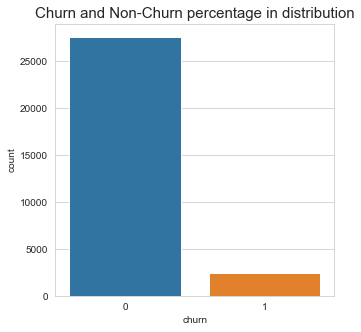

In [69]:
#Analyzing the count of Target Variable

plt.figure(figsize = (5,5))
plt.title("Churn and Non-Churn percentage in distribution",fontsize=15)
sns.countplot(x= "churn",data = tele_churn_hv)
plt.show()

# Target 0: Customer who are yet to churn
# Target 1: Customers who have churned

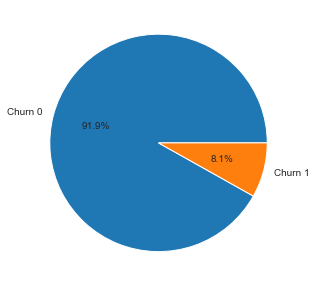

In [70]:
# To check imbalance percentage:

plt.figure(figsize = (5,5))
target_0_perc=100*(len(tele_churn_hv[tele_churn_hv["churn"]==0])/len(tele_churn_hv))
target_1_perc=100*(len(tele_churn_hv[tele_churn_hv["churn"]==1])/len(tele_churn_hv))
sizes=[target_0_perc,target_1_perc]
target_labels=['Churn 0','Churn 1']
plt.pie(sizes, labels=target_labels, autopct='%1.1f%%')
plt.show()

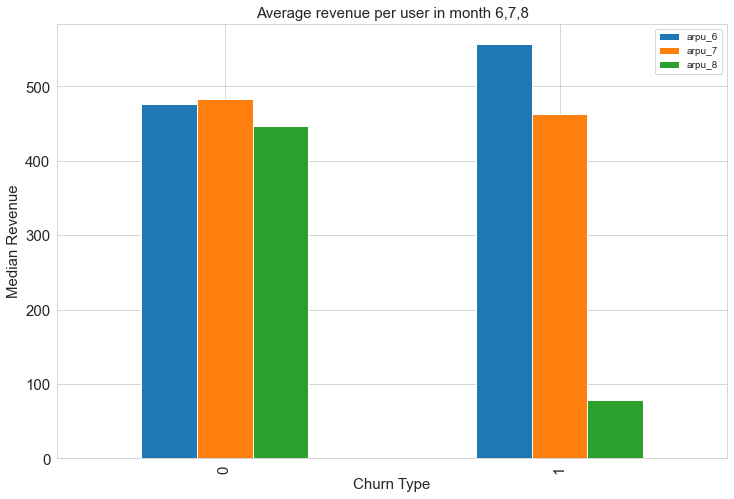

In [71]:
# Let's visualise median value of average revenue per user (ARPU)

tele_churn_hv.groupby('churn')['arpu_6', 'arpu_7', 'arpu_8'].median().plot.bar(figsize = [12,8])
plt.title("Average revenue per user in month 6,7,8", fontsize = 15)
plt.tick_params(labelsize = 15) 
plt.ylabel('Median Revenue', fontsize = 15)
plt.xlabel("Churn Type" , fontsize = 15)
plt.show()

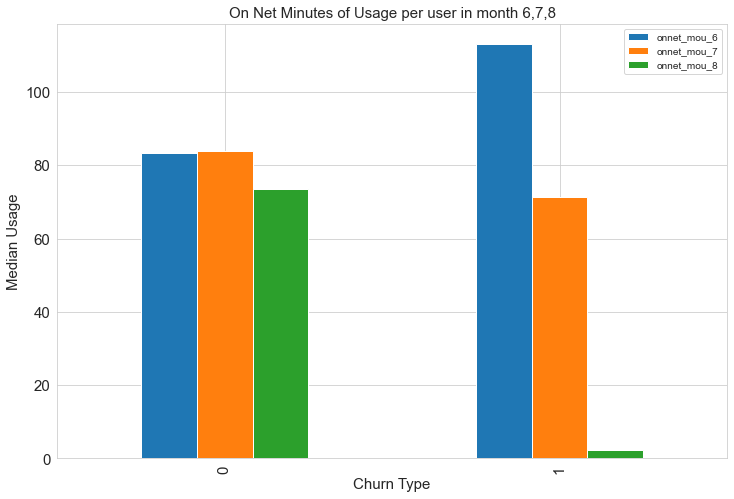

In [72]:
# Let's visualise median value of onnet minutes of usage

tele_churn_hv.groupby('churn')['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'].median().plot.bar(figsize = [12,8])
plt.title("On Net Minutes of Usage per user in month 6,7,8", fontsize = 15)
plt.tick_params(labelsize = 15) 
plt.ylabel('Median Usage', fontsize = 15)
plt.xlabel("Churn Type" , fontsize = 15)
plt.show()

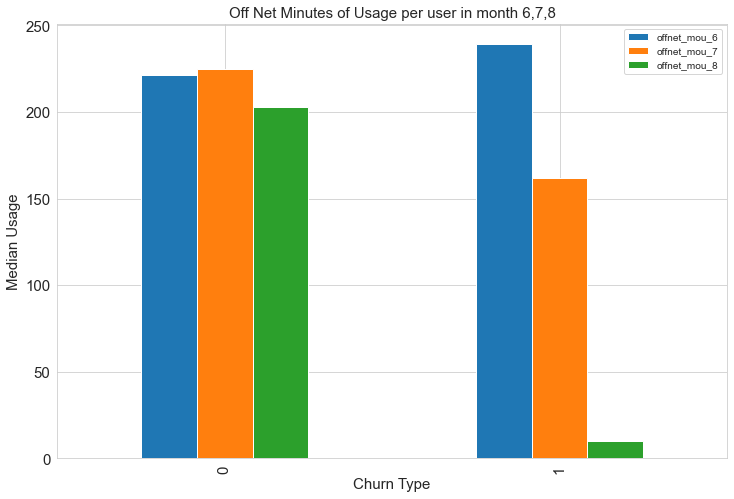

In [73]:
# Let's visualise median value of offnet minutes of usage

tele_churn_hv.groupby('churn')['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'].median().plot.bar(figsize = [12,8])
plt.title("Off Net Minutes of Usage per user in month 6,7,8", fontsize = 15)
plt.tick_params(labelsize = 15) 
plt.ylabel('Median Usage', fontsize = 15)
plt.xlabel("Churn Type" , fontsize = 15)
plt.show()

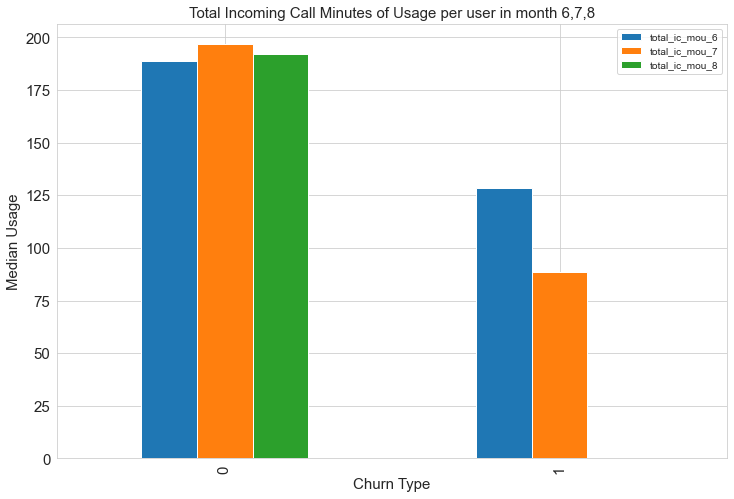

In [74]:
# Let's visualise median value of Total incoming call minutes of usage

tele_churn_hv.groupby('churn')['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'].median().plot.bar(figsize = [12,8])
plt.title("Total Incoming Call Minutes of Usage per user in month 6,7,8", fontsize = 15)
plt.tick_params(labelsize = 15) 
plt.ylabel('Median Usage', fontsize = 15)
plt.xlabel("Churn Type" , fontsize = 15)
plt.show()

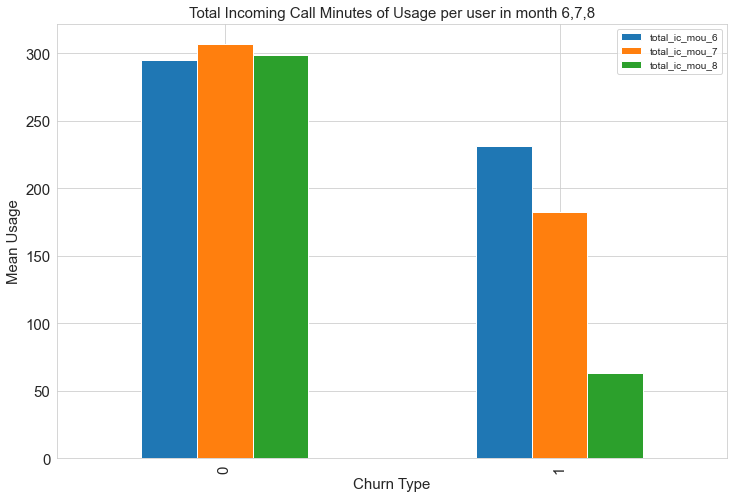

In [75]:
# Let's visualise mean value of Total incoming call minutes of usage

tele_churn_hv.groupby('churn')['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'].mean().plot.bar(figsize = [12,8])
plt.title("Total Incoming Call Minutes of Usage per user in month 6,7,8", fontsize = 15)
plt.tick_params(labelsize = 15) 
plt.ylabel('Mean Usage', fontsize = 15)
plt.xlabel("Churn Type" , fontsize = 15)
plt.show()

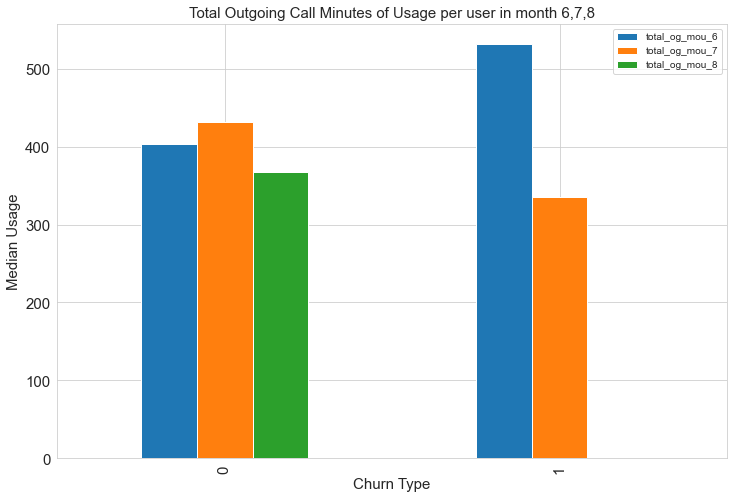

In [76]:
# Let's visualise median value of Total outgoing call minutes of usage

tele_churn_hv.groupby('churn')['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'].median().plot.bar(figsize = [12,8])
plt.title("Total Outgoing Call Minutes of Usage per user in month 6,7,8", fontsize = 15)
plt.tick_params(labelsize = 15) 
plt.ylabel('Median Usage', fontsize = 15)
plt.xlabel("Churn Type" , fontsize = 15)
plt.show()

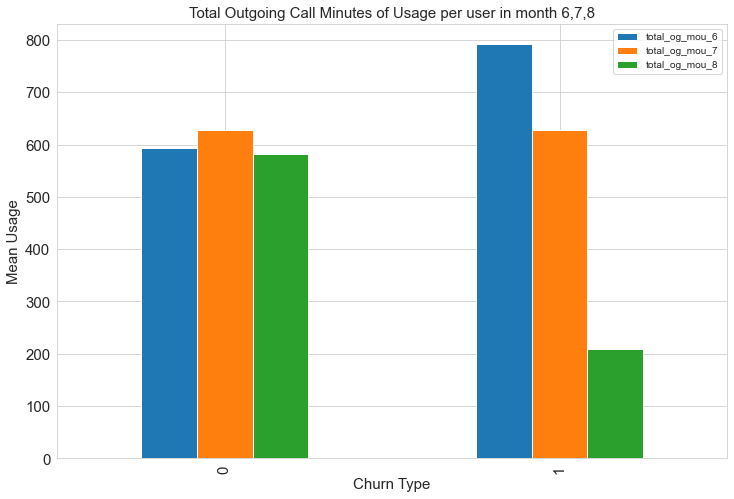

In [77]:
# Let's visualise mean value of Total outgoing call minutes of usage

tele_churn_hv.groupby('churn')['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'].mean().plot.bar(figsize = [12,8])
plt.title("Total Outgoing Call Minutes of Usage per user in month 6,7,8", fontsize = 15)
plt.tick_params(labelsize = 15) 
plt.ylabel('Mean Usage', fontsize = 15)
plt.xlabel("Churn Type" , fontsize = 15)
plt.show()

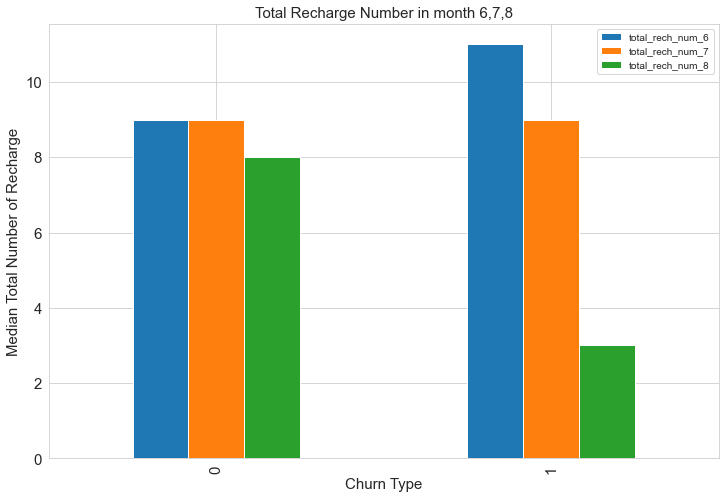

In [78]:
# Let's visualise median value of Total Number of Recharge

tele_churn_hv.groupby('churn')['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'].median().plot.bar(figsize = [12,8])
plt.title("Total Recharge Number in month 6,7,8", fontsize = 15)
plt.tick_params(labelsize = 15) 
plt.ylabel('Median Total Number of Recharge', fontsize = 15)
plt.xlabel("Churn Type" , fontsize = 15)
plt.show()

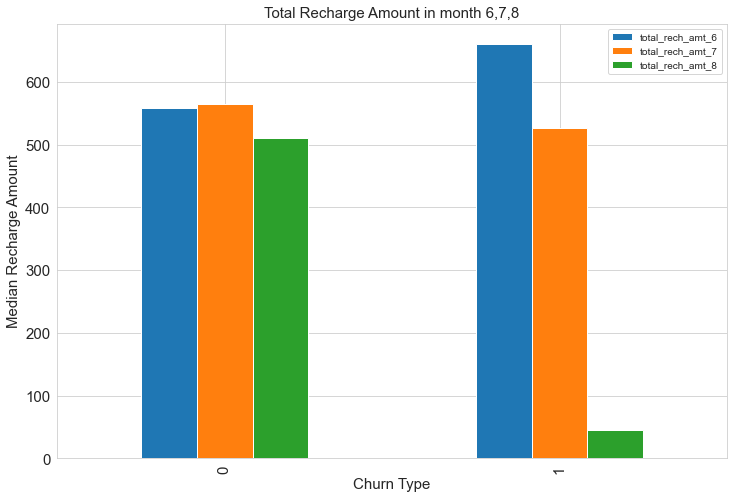

In [79]:
# Let's visualise median value of Total Recharge Amount

tele_churn_hv.groupby('churn')['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'].median().plot.bar(figsize = [12,8])
plt.title("Total Recharge Amount in month 6,7,8", fontsize = 15)
plt.tick_params(labelsize = 15) 
plt.ylabel('Median Recharge Amount', fontsize = 15)
plt.xlabel("Churn Type" , fontsize = 15)
plt.show()

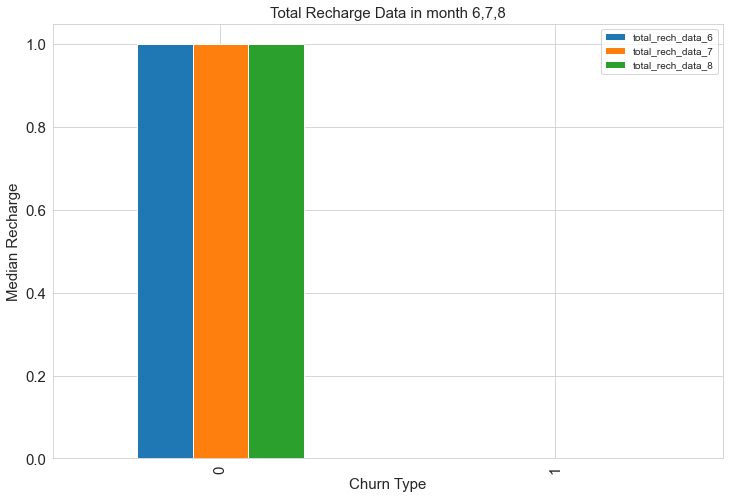

In [80]:
# Let's visualise median value of Total Recharge Data

tele_churn_hv.groupby('churn')['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8'].median().plot.bar(figsize = [12,8])
plt.title("Total Recharge Data in month 6,7,8", fontsize = 15)
plt.tick_params(labelsize = 15) 
plt.ylabel('Median Recharge', fontsize = 15)
plt.xlabel("Churn Type" , fontsize = 15)
plt.show()

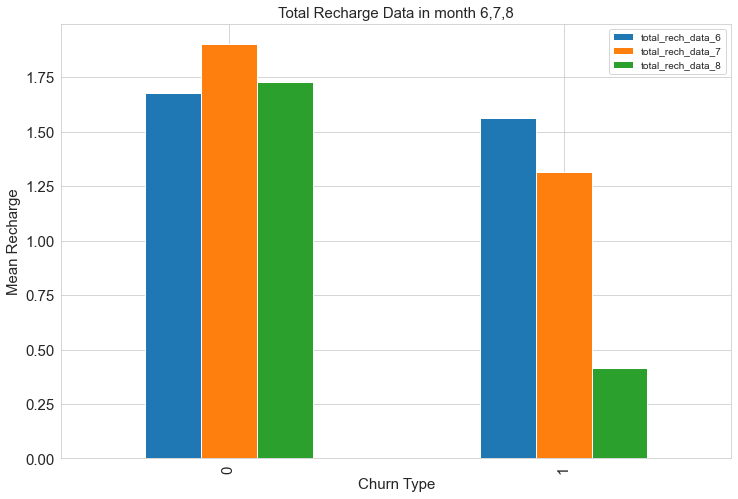

In [81]:
# Let's visualise mean value of Total Recharge Data

tele_churn_hv.groupby('churn')['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8'].mean().plot.bar(figsize = [12,8])
plt.title("Total Recharge Data in month 6,7,8", fontsize = 15)
plt.tick_params(labelsize = 15) 
plt.ylabel('Mean Recharge', fontsize = 15)
plt.xlabel("Churn Type" , fontsize = 15)
plt.show()

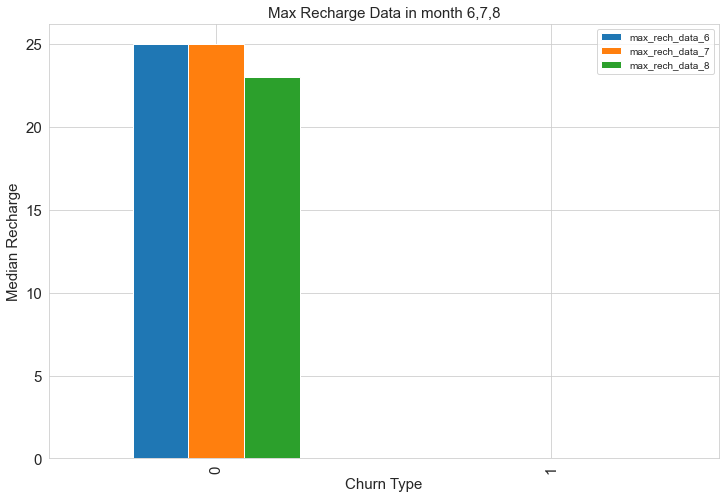

In [82]:
# Let's visualise median value of Max Recharge Data

tele_churn_hv.groupby('churn')['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'].median().plot.bar(figsize = [12,8])
plt.title("Max Recharge Data in month 6,7,8", fontsize = 15)
plt.tick_params(labelsize = 15) 
plt.ylabel('Median Recharge', fontsize = 15)
plt.xlabel("Churn Type" , fontsize = 15)
plt.show()

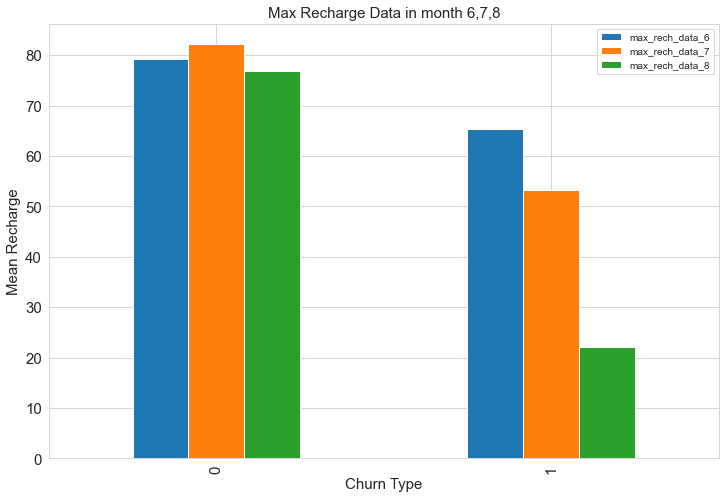

In [83]:
# Let's visualise mean value of Max Recharge Data

tele_churn_hv.groupby('churn')['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'].mean().plot.bar(figsize = [12,8])
plt.title("Max Recharge Data in month 6,7,8", fontsize = 15)
plt.tick_params(labelsize = 15) 
plt.ylabel('Mean Recharge', fontsize = 15)
plt.xlabel("Churn Type" , fontsize = 15)
plt.show()

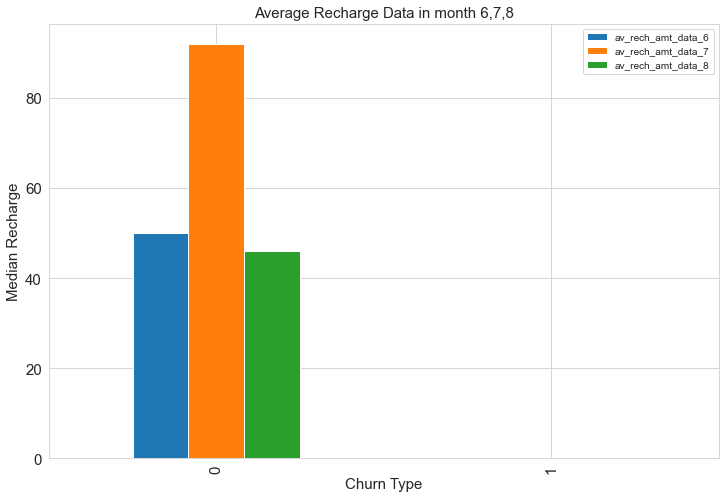

In [84]:
# Let's visualise median value of Average Data Recharge for 6th, 7th, and 8th month 

tele_churn_hv.groupby('churn')['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'].median().plot.bar(figsize = [12,8])
plt.title("Average Recharge Data in month 6,7,8", fontsize = 15)
plt.tick_params(labelsize = 15) 
plt.ylabel('Median Recharge', fontsize = 15)
plt.xlabel("Churn Type" , fontsize = 15)
plt.show()

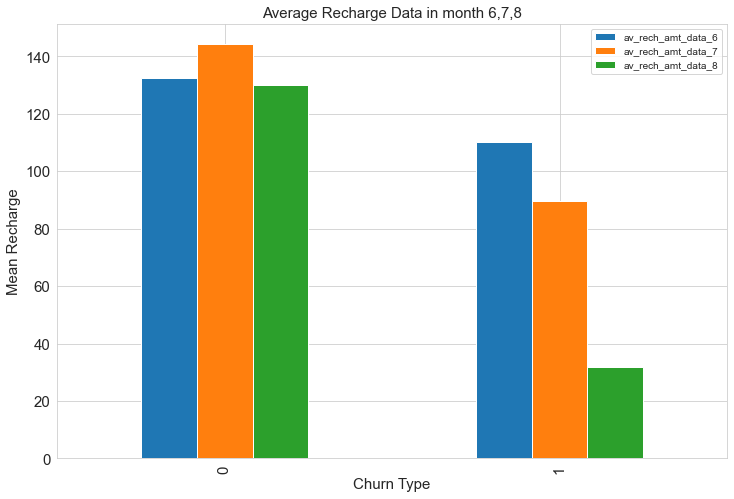

In [85]:
# Let's visualise mean value of Average Data Recharge for 6th, 7th, and 8th month 

tele_churn_hv.groupby('churn')['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'].mean().plot.bar(figsize = [12,8])
plt.title("Average Recharge Data in month 6,7,8", fontsize = 15)
plt.tick_params(labelsize = 15) 
plt.ylabel('Mean Recharge', fontsize = 15)
plt.xlabel("Churn Type" , fontsize = 15)
plt.show()

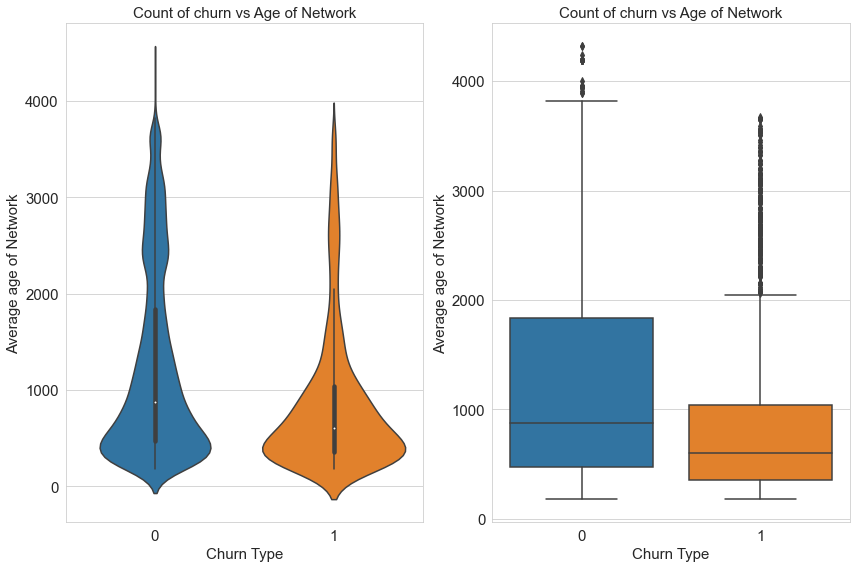

In [86]:
# Let's visualise Churn vs Average Age of Network

plt.figure(figsize = (12,8))

plt.subplot(1,2,1)
sns.violinplot(x = 'churn', y = 'aon', data = tele_churn_hv, orient = 'v')
plt.title("Count of churn vs Age of Network", fontsize = 15)
plt.tick_params(labelsize = 15) 
plt.ylabel('Average age of Network', fontsize = 15)
plt.xlabel("Churn Type" , fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(x = 'churn', y = 'aon', data = tele_churn_hv, orient = 'v')
plt.title("Count of churn vs Age of Network", fontsize = 15)
plt.tick_params(labelsize = 15) 
plt.ylabel('Average age of Network', fontsize = 15)
plt.xlabel("Churn Type" , fontsize = 15)

plt.tight_layout()
plt.show()

In [87]:
tele_churn_hv.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 141 columns):
 #   Column              Dtype  
---  ------              -----  
 0   arpu_6              float64
 1   arpu_7              float64
 2   arpu_8              float64
 3   onnet_mou_6         float64
 4   onnet_mou_7         float64
 5   onnet_mou_8         float64
 6   offnet_mou_6        float64
 7   offnet_mou_7        float64
 8   offnet_mou_8        float64
 9   roam_ic_mou_6       float64
 10  roam_ic_mou_7       float64
 11  roam_ic_mou_8       float64
 12  roam_og_mou_6       float64
 13  roam_og_mou_7       float64
 14  roam_og_mou_8       float64
 15  loc_og_t2t_mou_6    float64
 16  loc_og_t2t_mou_7    float64
 17  loc_og_t2t_mou_8    float64
 18  loc_og_t2m_mou_6    float64
 19  loc_og_t2m_mou_7    float64
 20  loc_og_t2m_mou_8    float64
 21  loc_og_t2f_mou_6    float64
 22  loc_og_t2f_mou_7    float64
 23  loc_og_t2f_mou_8    float64
 24  loc_og_t2c_mou_6    float64

In [88]:
# Calculating the difference between the 8th month's revenue and average revenue of 6th and 7th month
tele_churn_hv['diff_arpu'] = tele_churn_hv['arpu_8'] - ((tele_churn_hv['arpu_6'] + tele_churn_hv['arpu_7'])/2)

# Calculating the difference between the 8th month's MoU and average MoU of 6th and 7th month
tele_churn_hv['diff_total_og_mou'] = tele_churn_hv['total_og_mou_8'] - ((tele_churn_hv['total_og_mou_6'] + tele_churn_hv['total_og_mou_7'])/2)
tele_churn_hv['diff_total_ic_mou'] = tele_churn_hv['total_ic_mou_8'] - ((tele_churn_hv['total_ic_mou_6'] + tele_churn_hv['total_ic_mou_7'])/2)

# Calculating the difference between the 8th month's total number of recharge and average total number of recharge of 6th and 7th month
tele_churn_hv['diff_total_rech_num'] = tele_churn_hv['total_rech_num_8'] - ((tele_churn_hv['total_rech_num_6'] + tele_churn_hv['total_rech_num_7'])/2)

# Calculating the difference between the 8th month's total recharge amount and average total recharge amount of 6th and 7th month
tele_churn_hv['diff_total_rech_amt'] = tele_churn_hv['total_rech_amt_8'] - ((tele_churn_hv['total_rech_amt_6'] + tele_churn_hv['total_rech_amt_7'])/2)

# Calculating the difference between the 8th month's max recharge amount and average max recharge amount of 6th and 7th month
tele_churn_hv['diff_max_rech_amt'] = tele_churn_hv['max_rech_amt_8'] - ((tele_churn_hv['max_rech_amt_6'] + tele_churn_hv['max_rech_amt_6'])/2)

# Calculating the difference between the 8th month's total recharge data and average recharge data of recharge of 6th and 7th month
tele_churn_hv['diff_total_rech_data'] = tele_churn_hv['total_rech_num_8'] - ((tele_churn_hv['total_rech_num_6'] + tele_churn_hv['total_rech_num_7'])/2)

# Calculating the difference between the 8th month's max recharge data and average max recharge data of 6th and 7th month
tele_churn_hv['diff_max_rech_data'] = tele_churn_hv['max_rech_data_8'] - ((tele_churn_hv['max_rech_data_6'] + tele_churn_hv['max_rech_data_7'])/2)

# Calculating the difference between the 8th month's average recharge amount data and average recharge amount data of recharge of 6th and 7th month
tele_churn_hv['diff_av_rech_amt_data'] = tele_churn_hv['av_rech_amt_data_8'] - ((tele_churn_hv['av_rech_amt_data_6'] + tele_churn_hv['av_rech_amt_data_7'])/2)

# Calculating the difference between the 8th month's 2G recharge data and average 2G recharge data recharge of 6th and 7th month
tele_churn_hv['diff_vol_2g_mb'] = tele_churn_hv['vol_2g_mb_8'] - ((tele_churn_hv['vol_2g_mb_6'] + tele_churn_hv['vol_2g_mb_7'])/2)

# Calculating the difference between the 8th's month 3G recharge data and average 3G recharge data of 6th and 7th month
tele_churn_hv['diff_vol_3g_mb'] = tele_churn_hv['vol_3g_mb_8'] - ((tele_churn_hv['vol_3g_mb_6'] + tele_churn_hv['vol_3g_mb_7'])/2)


In [89]:
tele_churn_hv.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_6,30001.0,558.490824,460.640461,-2258.7090,309.8650,481.6940,699.943,27731.088
arpu_7,30001.0,560.782203,479.776947,-2014.0450,309.8260,480.9430,698.315,35145.834
arpu_8,30001.0,508.597957,501.961981,-945.8080,231.4730,427.5850,661.491,33543.624
onnet_mou_6,30001.0,260.793024,459.644368,0.0000,17.0800,84.5800,290.440,7376.710
onnet_mou_7,30001.0,267.819295,479.993989,0.0000,16.0300,82.8100,290.240,8157.780
onnet_mou_8,30001.0,234.112539,458.448598,0.0000,10.3900,65.6100,239.960,10752.560
offnet_mou_6,30001.0,373.693961,482.523558,0.0000,71.6100,222.5400,487.940,8362.360
offnet_mou_7,30001.0,378.103169,498.923555,0.0000,69.9100,220.0300,494.010,9667.130
offnet_mou_8,30001.0,335.077044,482.062509,0.0000,46.7400,182.7900,438.890,14007.340
roam_ic_mou_6,30001.0,16.110355,76.302156,0.0000,0.0000,0.0000,0.000,2613.310


In [90]:
tele_churn_hv.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 152 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   arpu_6                 float64
 1   arpu_7                 float64
 2   arpu_8                 float64
 3   onnet_mou_6            float64
 4   onnet_mou_7            float64
 5   onnet_mou_8            float64
 6   offnet_mou_6           float64
 7   offnet_mou_7           float64
 8   offnet_mou_8           float64
 9   roam_ic_mou_6          float64
 10  roam_ic_mou_7          float64
 11  roam_ic_mou_8          float64
 12  roam_og_mou_6          float64
 13  roam_og_mou_7          float64
 14  roam_og_mou_8          float64
 15  loc_og_t2t_mou_6       float64
 16  loc_og_t2t_mou_7       float64
 17  loc_og_t2t_mou_8       float64
 18  loc_og_t2m_mou_6       float64
 19  loc_og_t2m_mou_7       float64
 20  loc_og_t2m_mou_8       float64
 21  loc_og_t2f_mou_6       float64
 22  loc_og_t2f_mou_7     

In [91]:
# Let's look at categorical variables which had numeric values

cat_columns = ["night_pck_user_6","night_pck_user_7",
                       "night_pck_user_8","fb_user_6",          
                       "fb_user_7","fb_user_8"]  

In [92]:
tele_churn_hv[cat_columns].head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,0.0,0.0,0.0,1.0,1.0,1.0
7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,-1.0,0.0,0.0,-1.0,1.0,1.0
21,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
23,-1.0,0.0,0.0,-1.0,1.0,1.0


In [93]:
# Let's check values under categorical features:


for i in tele_churn_hv[cat_columns]:
    print('\n' + i)
    print('-'*30)
    print(tele_churn_hv[cat_columns][i].value_counts(dropna = False)) # This will show us all the null values


night_pck_user_6
------------------------------
 0.0    16349
-1.0    13245
 1.0      407
Name: night_pck_user_6, dtype: int64

night_pck_user_7
------------------------------
 0.0    16682
-1.0    12944
 1.0      375
Name: night_pck_user_7, dtype: int64

night_pck_user_8
------------------------------
 0.0    15612
-1.0    14048
 1.0      341
Name: night_pck_user_8, dtype: int64

fb_user_6
------------------------------
 1.0    15525
-1.0    13245
 0.0     1231
Name: fb_user_6, dtype: int64

fb_user_7
------------------------------
 1.0    15722
-1.0    12944
 0.0     1335
Name: fb_user_7, dtype: int64

fb_user_8
------------------------------
 1.0    14313
-1.0    14048
 0.0     1640
Name: fb_user_8, dtype: int64


In [94]:
#Calculate categorical features mean and replace those with categorical value

print(tele_churn_hv.groupby('night_pck_user_6')["churn"].mean())
print(tele_churn_hv.groupby('night_pck_user_7')["churn"].mean())
print(tele_churn_hv.groupby('night_pck_user_8')["churn"].mean())
print(tele_churn_hv.groupby('fb_user_6')["churn"].mean())
print(tele_churn_hv.groupby('fb_user_7')["churn"].mean())
print(tele_churn_hv.groupby('fb_user_8')["churn"].mean())

night_pck_user_6
-1.0    0.098754
 0.0    0.066977
 1.0    0.093366
Name: churn, dtype: float64
night_pck_user_7
-1.0    0.114802
 0.0    0.055869
 1.0    0.061333
Name: churn, dtype: float64
night_pck_user_8
-1.0    0.141088
 0.0    0.028824
 1.0    0.026393
Name: churn, dtype: float64
fb_user_6
-1.0    0.098754
 0.0    0.077173
 1.0    0.066860
Name: churn, dtype: float64
fb_user_7
-1.0    0.114802
 0.0    0.065918
 1.0    0.055146
Name: churn, dtype: float64
fb_user_8
-1.0    0.141088
 0.0    0.067683
 1.0    0.024314
Name: churn, dtype: float64


In [95]:
# Let's replace categorical values with their mean values:

tele_churn_hv['night_pck_user_6'] = tele_churn_hv['night_pck_user_6'].map({-1 : 0.098754, 0: 0.066977, 1 : 0.093366})
tele_churn_hv['night_pck_user_7'] = tele_churn_hv['night_pck_user_7'].map({-1 : 0.114802, 0: 0.055869, 1 : 0.061333})
tele_churn_hv['night_pck_user_8'] = tele_churn_hv['night_pck_user_8'].map({-1 : 0.141088, 0: 0.028824, 1 : 0.026393})

tele_churn_hv['fb_user_6'] = tele_churn_hv['fb_user_6'].map({-1 : 0.098754, 0: 0.077173, 1 : 0.066860})
tele_churn_hv['fb_user_7'] = tele_churn_hv['fb_user_7'].map({-1 : 0.114802, 0: 0.065918, 1 : 0.055146})
tele_churn_hv['fb_user_8'] = tele_churn_hv['fb_user_8'].map({-1 : 0.141088, 0: 0.067683, 1 : 0.024314})

In [96]:
tele_churn_hv[cat_columns].sample(10)

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
41350,0.098754,0.114802,0.141088,0.098754,0.114802,0.141088
60723,0.066977,0.055869,0.028824,0.066860,0.055146,0.024314
61546,0.098754,0.114802,0.141088,0.098754,0.114802,0.141088
57832,0.098754,0.055869,0.141088,0.098754,0.065918,0.141088
2292,0.098754,0.055869,0.141088,0.098754,0.055146,0.141088
1617,0.066977,0.055869,0.028824,0.066860,0.055146,0.024314
10015,0.066977,0.114802,0.141088,0.066860,0.114802,0.141088
64631,0.066977,0.055869,0.028824,0.066860,0.055146,0.024314
13074,0.066977,0.055869,0.141088,0.066860,0.055146,0.141088
53051,0.066977,0.055869,0.028824,0.066860,0.055146,0.024314


In [97]:
# Let's check values under categorical features:


for i in tele_churn_hv[cat_columns]:
    print('\n' + i)
    print('-'*30)
    print(tele_churn_hv[cat_columns][i].value_counts(dropna = False)) # This will show us all the null values


night_pck_user_6
------------------------------
0.066977    16349
0.098754    13245
0.093366      407
Name: night_pck_user_6, dtype: int64

night_pck_user_7
------------------------------
0.055869    16682
0.114802    12944
0.061333      375
Name: night_pck_user_7, dtype: int64

night_pck_user_8
------------------------------
0.028824    15612
0.141088    14048
0.026393      341
Name: night_pck_user_8, dtype: int64

fb_user_6
------------------------------
0.066860    15525
0.098754    13245
0.077173     1231
Name: fb_user_6, dtype: int64

fb_user_7
------------------------------
0.055146    15722
0.114802    12944
0.065918     1335
Name: fb_user_7, dtype: int64

fb_user_8
------------------------------
0.024314    14313
0.141088    14048
0.067683     1640
Name: fb_user_8, dtype: int64


### Outlier Removal

We tried the outlier removal using the above code but with outliers identified as more than 3rd deviation, resulting dataset was at 12191 rows from the original size of 30001. Hence, for this reason we did not perform outlier treatment.

We also tried Robust Scaling since it also handles outliers but when we used Robust Scaling, we were getting 96% varaince explained by 3 PCA components where as the suggested number of components were between 15 and 25 components for model building.

### Model Building

In [98]:
# importing neccessary libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

### Train_Test_Split

In [99]:
df_train, df_test = train_test_split(tele_churn_hv,
                                    train_size = 0.8,
                                    test_size = 0.2,
                                    shuffle = True,
                                    random_state = 42)

In [100]:
# Let's check the shape of the train and test sets

print(df_train.shape, df_test.shape)

(24000, 152) (6001, 152)


In [101]:
# Let's create two sets of Train and Test for balancing purpose

# One set will be used along with Smote
# The second set will be used along with weight_class method 

In [102]:
# Creating X_train, X_test, y_train, y_test

# Train Data Sets
y_train = df_train.pop('churn')
X_train = df_train

# Test Data Sets
y_test = df_test.pop('churn')
X_test = df_test

In [103]:
# Creating X_train, X_test, y_train, y_test to be used with weight_class method

X_train_2 = X_train.copy()
y_train_2 = y_train.copy()

X_test_2 = X_test.copy()
y_test_2 = y_test.copy()

In [104]:
# Let's check the shape of the resultant data sets

print(X_train.shape, y_train.shape)
print('\n')
print(X_test.shape, y_test.shape)

(24000, 151) (24000,)


(6001, 151) (6001,)


In [105]:

print(X_train_2.shape, y_train_2.shape)
print('\n')
print(X_test_2.shape, y_test_2.shape)

(24000, 151) (24000,)


(6001, 151) (6001,)


### SMOTE Oversampling

In [106]:
# Performing SMOTE Oversampling

from imblearn.over_sampling import SMOTE

In [107]:
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [108]:
# Check the shape of the resultant dataset

print("Shape of the resampled X_train: {}".format(X_train_smote.shape))
print("Value count of resample y_train: \n{}".format(y_train_smote.value_counts()))


Shape of the resampled X_train: (44050, 151)
Value count of resample y_train: 
1    22025
0    22025
Name: churn, dtype: int64


### Scaling

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled_temp = scaler.fit_transform(X_train_smote)
X_train_scaled = pd.DataFrame(X_train_scaled_temp,columns=X_train.columns)

In [110]:
X_train_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,diff_arpu,diff_total_og_mou,diff_total_ic_mou,diff_total_rech_num,diff_total_rech_amt,diff_max_rech_amt,diff_total_rech_data,diff_max_rech_data,diff_av_rech_amt_data,diff_vol_2g_mb,diff_vol_3g_mb
0,0.085036,0.063441,0.022656,0.003461,0.007242,0.005251,0.002776,0.003955,0.004243,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.004190,0.007848,0.005368,0.003296,0.008018,0.010618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006684,0.012330,0.010305,0.000000,0.000123,0.000000,0.000000,0.000181,0.000205,0.005934,0.0,0.007506,0.000497,0.000245,0.000482,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.005905,0.008562,0.007963,0.017024,0.009866,0.018400,0.014579,0.015014,0.012542,0.000000,0.000000,0.000113,0.019146,0.018396,0.024512,0.000496,0.00147,0.000297,0.002929,0.001890,0.006073,0.000000,0.006065,0.002122,0.002982,0.003260,0.006470,0.020618,0.018939,0.028128,0.004049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016287,0.036232,0.015306,0.012845,0.009223,0.011297,0.062843,0.062843,0.056642,0.029925,0.029925,0.056642,0.016393,0.018519,0.018182,0.162058,0.162058,0.162058,0.033395,0.057732,0.062054,0.000010,0.002179,0.001920,0.025701,0.028216,0.030197,0.0,0.0,0.021195,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.071429,0.0625,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.071963,0.042920,0.019544,0.001502,0.0,0.317743,0.309807,0.469831,0.523381,0.331071,0.497263,0.523381,0.490772,0.658887,0.371382,0.469298
1,0.092443,0.066911,0.019352,0.003659,0.000077,0.000021,0.057687,0.006032,0.007647,0.024603,0.000304,0.00786,0.046053,0.021678,0.000883,0.000000,0.000000,0.000000,0.020976,0.000000,0.006940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016123,0.000000,0.003377,0.003612,0.000000,0.000026,0.025032,0.000000,0.004909,0.000000,0.0,0.000000,0.025017,0.000000,0.004913,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.037750,0.000000,0.007344,0.000000,0.000000,0.000000,0.007033,0.000000,0.0042

In [111]:
X_test_scaled_temp = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_temp,columns=X_test.columns)

In [112]:
X_test_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,diff_arpu,diff_total_og_mou,diff_total_ic_mou,diff_total_rech_num,diff_total_rech_amt,diff_max_rech_amt,diff_total_rech_data,diff_max_rech_data,diff_av_rech_amt_data,diff_vol_2g_mb,diff_vol_3g_mb
0,0.092409,0.073450,0.036539,0.004906,0.007853,0.005453,0.062382,0.038961,0.021791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005696,0.006818,0.005574,0.091557,0.080320,0.056324,0.000259,0.002959,0.008304,0.0,0.008847,0.000000,0.076080,0.054730,0.033499,0.000201,0.001671,0.0,0.000140,0.000216,0.001295,0.0,0.0,0.0,0.000317,0.001427,0.001292,0.0,0.0,0.0,0.001740,0.005815,0.001299,0.002230,0.0,0.0,0.062349,0.038981,0.025699,0.013155,0.007363,0.003994,0.046197,0.063270,0.036591,0.007734,0.007216,0.007529,0.038532,0.049529,0.036721,0.000286,0.002731,0.003465,0.004052,0.001472,0.005691,0.003575,0.0,0.001061,0.004608,0.003107,0.008148,0.040488,0.045851,0.040621,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.022801,0.086957,0.045918,0.015715,0.020826,0.023455,0.031920,0.038404,0.102270,0.031920,0.012469,0.032367,0.000000,0.018519,0.018182,0.000000,0.099035,0.292605,0.000000,0.035281,0.112041,0.000000,0.005901,0.000240,0.000000,0.002644,0.054925,1.0,0.0,0.021195,0.00,0.2,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0625,0.000000,0.0,0.0,1.0,0.0,0.0,0.738710,0.037420,0.009789,0.032310,0.08775,0.327084,0.302312,0.454374,0.528777,0.343586,0.538892,0.528777,0.633145,0.730322,0.368943,0.533749
1,0.082423,0.060167,0.010184,0.000000,0.000000,0.000000,0.000198,0.000940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000617,0.000000,0.000000,0.000000,0.000000,0.0,0.004406,0.000000,0.000000,0.000366,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.001349,0.004985,0.000000,0.000000,0.0,0.0,0.000182,0.000803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000028,0.000000,0.000000,0.000000,0.0000

In [113]:
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_6,44050.0,0.095279,0.016666,0.0,0.086015,0.092482,0.100510,1.0
arpu_7,44050.0,0.068672,0.012879,0.0,0.061532,0.066697,0.072734,1.0
arpu_8,44050.0,0.021303,0.013867,0.0,0.011628,0.018507,0.026372,1.0
onnet_mou_6,44050.0,0.041307,0.071245,0.0,0.002488,0.013039,0.046620,1.0
onnet_mou_7,44050.0,0.033369,0.060467,0.0,0.001533,0.009675,0.035695,1.0
onnet_mou_8,44050.0,0.017344,0.039242,0.0,0.000063,0.002920,0.015367,1.0
offnet_mou_6,44050.0,0.058868,0.077703,0.0,0.010140,0.032761,0.074719,1.0
offnet_mou_7,44050.0,0.038511,0.055062,0.0,0.005368,0.019610,0.049152,1.0
offnet_mou_8,44050.0,0.017246,0.030164,0.0,0.000355,0.005992,0.021716,1.0
roam_ic_mou_6,44050.0,0.007845,0.035393,0.0,0.000000,0.000000,0.000363,1.0


In [114]:
X_test_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_6,6001.0,0.093699,0.013420,0.007252,0.085605,0.091280,0.098469,0.318194
arpu_7,6001.0,0.069288,0.010837,0.030060,0.062647,0.067392,0.073114,0.247941
arpu_8,6001.0,0.025134,0.012568,-0.017725,0.016952,0.022886,0.029791,0.192960
onnet_mou_6,6001.0,0.035966,0.062835,0.000000,0.002374,0.011811,0.040103,0.894946
onnet_mou_7,6001.0,0.033496,0.059633,0.000000,0.002032,0.010672,0.036277,0.908459
onnet_mou_8,6001.0,0.024133,0.048270,0.000000,0.001075,0.006945,0.024179,1.077691
offnet_mou_6,6001.0,0.053823,0.070128,0.000000,0.010175,0.032127,0.070369,1.201064
offnet_mou_7,6001.0,0.039246,0.050412,0.000000,0.007302,0.022490,0.051809,0.608985
offnet_mou_8,6001.0,0.023869,0.033644,0.000000,0.003323,0.012733,0.031218,0.507046
roam_ic_mou_6,6001.0,0.006028,0.030025,0.000000,0.000000,0.000000,0.000000,1.009355


### PCA

In [115]:
from sklearn.decomposition import PCA

In [116]:
pca = PCA(random_state = 42)

X_train_pca = pca.fit(X_train_scaled)

In [117]:
X_train_pca.components_

array([[-3.98711668e-03, -1.83249579e-03,  2.17022194e-04, ...,
        -2.68272474e-03, -1.82132199e-03, -8.21177810e-04],
       [ 2.85274206e-04,  5.08300714e-03,  8.44955251e-03, ...,
         2.82112288e-02,  1.10700993e-02,  1.39544409e-02],
       [ 5.31884607e-03, -2.64697354e-03,  1.87705028e-03, ...,
         1.24501500e-02,  4.44956427e-03,  5.28061965e-03],
       ...,
       [ 0.00000000e+00,  2.07785582e-16, -3.44992139e-16, ...,
         1.90793859e-02,  4.98883818e-01,  3.12472373e-01],
       [ 0.00000000e+00, -5.76515146e-16, -5.01755493e-17, ...,
         2.88535717e-01,  1.34866899e-01, -1.86375863e-01],
       [-3.29960830e-01, -4.08849200e-01,  7.45717690e-01, ...,
         4.51028104e-16,  1.99493200e-16, -1.76941795e-16]])

In [118]:
X_train_pca.explained_variance_ratio_

array([6.03578873e-01, 1.44129191e-01, 1.00009710e-01, 3.01273593e-02,
       2.06770157e-02, 1.12368317e-02, 9.30103447e-03, 8.83634770e-03,
       6.40841593e-03, 6.07415591e-03, 4.65932272e-03, 3.71104215e-03,
       3.23551507e-03, 3.09065121e-03, 2.81060410e-03, 2.32641324e-03,
       2.04223936e-03, 1.88834390e-03, 1.78089742e-03, 1.76494080e-03,
       1.73458658e-03, 1.60244903e-03, 1.52718855e-03, 1.41513659e-03,
       1.34307246e-03, 1.28115893e-03, 1.23043551e-03, 1.15274706e-03,
       1.06992500e-03, 1.04538340e-03, 9.17053765e-04, 8.90780778e-04,
       8.42668753e-04, 7.87962319e-04, 7.32401083e-04, 6.76377899e-04,
       6.53404395e-04, 6.25923116e-04, 5.75941904e-04, 5.64201111e-04,
       5.34706802e-04, 5.20728450e-04, 5.03480905e-04, 4.85342828e-04,
       4.46570501e-04, 4.38304508e-04, 4.27402815e-04, 3.62403493e-04,
       3.57423096e-04, 3.51914879e-04, 3.17680282e-04, 3.11839816e-04,
       2.98457849e-04, 2.82871057e-04, 2.75372001e-04, 2.58162803e-04,
      

In [119]:
var_cumu = np.cumsum(X_train_pca.explained_variance_ratio_)

#Convert explained variance to DataFrame
var_cumu_df = pd.DataFrame({"Cumulative Variance":var_cumu}) 
var_cumu_df.head(30)

,Cumulative Variance
0,0.603579
1,0.747708
2,0.847718
3,0.877845
4,0.898522
5,0.909759
6,0.919060
7,0.927896
8,0.934305
9,0.940379


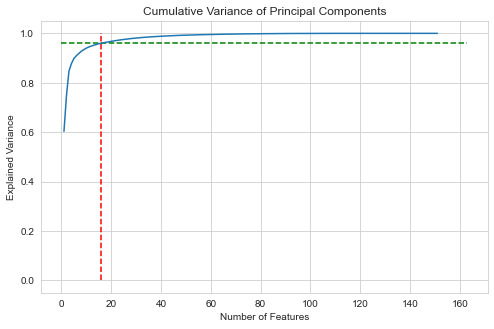

In [120]:
# Making the Scree Plot

plt.figure(figsize = (8,5))
plt.plot(range(1, len(var_cumu)+1), var_cumu)
plt.hlines(y = 0.96, xmax=163, xmin=0, color = 'g', linestyle = '--')
plt.vlines(x = 16, ymax=1, ymin=0, color = 'r', linestyle = '--')
plt.title("Cumulative Variance of Principal Components")
plt.ylabel("Explained Variance")
plt.xlabel("Number of Features")
plt.show()

In [121]:
# Let's figure out number of components explaining 96% of variance via code

pca_ncomp = PCA(0.96,random_state= 42)
X_train_pca_ncomp = pca_ncomp.fit_transform(X_train_scaled)
print("Number of principal components explaining 96% of variance:{}".format(X_train_pca_ncomp.shape[1]))

Number of principal components explaining 96% of variance:16


In [122]:
# Running final PCA with 16 components

final_pca = PCA(n_components = 16)

# Running Final PCA on Scaled X Train
X_train_final_pca = final_pca.fit_transform(X_train_scaled)

In [123]:
# Checking shape of train after PCA
print(X_train_final_pca.shape)

(44050, 16)


In [124]:
# Checking correlation post PCA

corrmat = np.corrcoef(X_train_final_pca.transpose())

In [125]:
corrmat.shape

(16, 16)

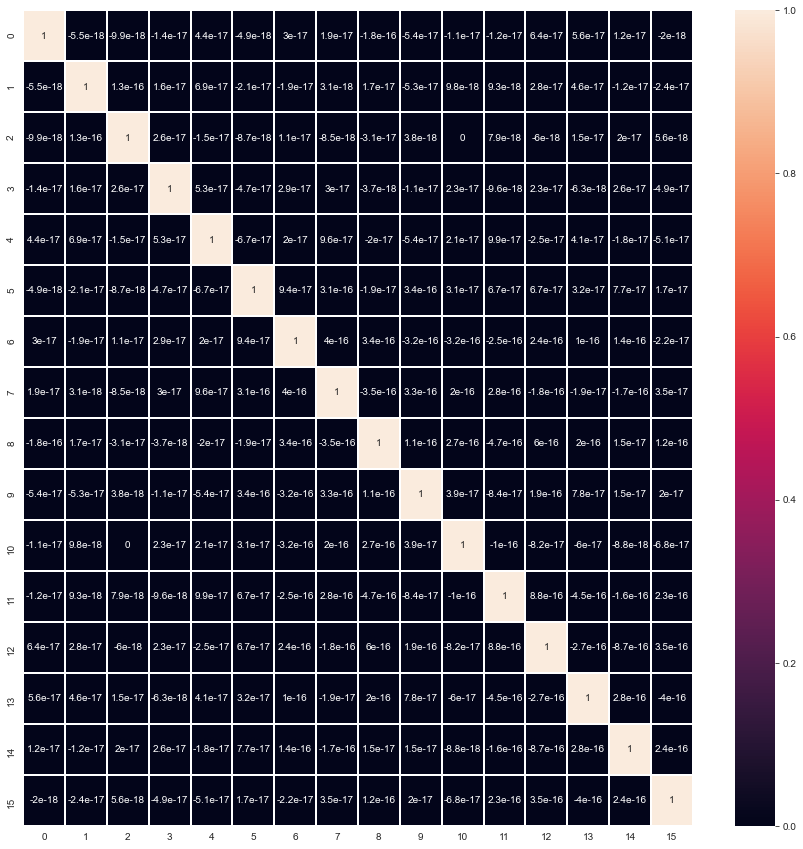

In [126]:
# Plotting the heatmap of the corr matrix

plt.figure(figsize = (15,15))
sns.heatmap(corrmat, annot = True, linewidth = 1)
plt.show()

In [127]:
# From the above operation, we have taken care of multi-collinearity

In [128]:
# Running Final PCA on Scaled X Test

X_test_final_pca = final_pca.transform(X_test_scaled)

In [129]:
# Checking shape of test datasets after PCA

print(X_test_final_pca.shape)

(6001, 16)


### Model Building with SMOTE

- We will be making use of the following models:
 - Logistic Regression
 - Decision Tree
 - Random Forest
 - Gradient Boosting
 - XGBoost

In [130]:
# Importing necessary libraries to help in model evaluation

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [131]:
# We'll evalulate the model on the following metrics

# Precision
# Recall
# F1-score
# ROC_AUC

def performance_evaluation_train_data(model_name, y_true, y_pred, y_score):
    model_name = model_name
    
    precision_score_train = np.round(metrics.precision_score(y_true, y_pred), 2)
    print("The training precision score of the {} is {}".format(model_name, precision_score_train))
    
    recall_score_train = np.round(metrics.recall_score(y_true, y_pred), 2)
    print("The training recall score of the {} is {}".format(model_name, recall_score_train))
    
    f1_score_train = np.round(metrics.f1_score(y_true, y_pred), 2)
    print("The training f1 score of the {} is {}".format(model_name, f1_score_train))
    
    roc_auc_score_train = np.round(metrics.roc_auc_score(y_true, y_score), 2)
    print("The training roc auc score of the {} is {}".format(model_name, roc_auc_score_train))
    
    return pd.DataFrame({"Model_Train":[model_name],
                         "Precision":[precision_score_train],
                         "Recall":[recall_score_train],
                         "F1_Score":[f1_score_train],
                         "ROC_AUC":[roc_auc_score_train]})

In [132]:
def performance_evaluation_test_data(model_name, y_true, y_pred, y_score):
    model_name = model_name
    
    precision_score_test = np.round(metrics.precision_score(y_true, y_pred), 2)
    print("The training precision score of the {} is {}".format(model_name, precision_score_test))
    
    recall_score_test = np.round(metrics.recall_score(y_true, y_pred), 2)
    print("The training recall score of the {} is {}".format(model_name, recall_score_test))
    
    f1_score_test = np.round(metrics.f1_score(y_true, y_pred), 2)
    print("The training f1 score of the {} is {}".format(model_name, f1_score_test))
    
    roc_auc_score_test = np.round(metrics.roc_auc_score(y_true, y_score), 2)
    print("The training roc auc score of the {} is {}".format(model_name, roc_auc_score_test))
    
    return pd.DataFrame({"Model_Test":[model_name],
                         "Precision":[precision_score_test],
                         "Recall":[recall_score_test],
                         "F1_Score":[f1_score_test],
                         "ROC_AUC":[roc_auc_score_test]})


In [133]:
evaluation_score_train = pd.DataFrame({"Model_Train":[None],
                         "Precision":[None],
                         "Recall":[None],
                         "F1_Score":[None],
                         "ROC_AUC":[None]}) 

In [134]:
evaluation_score_test = pd.DataFrame({"Model_Test":[None],
                         "Precision":[None],
                         "Recall":[None],
                         "F1_Score":[None],
                         "ROC_AUC":[None]})

### 1. Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_final_pca, y_train_smote)
cv_score = cross_val_score(lr_model, X_train_final_pca, y_train_smote, cv = 3, scoring = 'roc_auc' )
print("Mean Cross Validation score for logistic regression: {}".format(np.round(np.mean(cv_score),2)))

Mean Cross Validation score for logistic regression: 0.9


In [136]:
# Predictions on Train Set

y_pred_train = lr_model.predict(X_train_final_pca)
y_score_train = lr_model.predict_proba(X_train_final_pca)

In [137]:
# Model Evaluation on Train Set

train_evaluation_score_1 = performance_evaluation_train_data('Logistic Regression SMOTE', y_train_smote, y_pred_train, y_score_train[:,1])

The training precision score of the Logistic Regression SMOTE is 0.83
The training recall score of the Logistic Regression SMOTE is 0.85
The training f1 score of the Logistic Regression SMOTE is 0.84
The training roc auc score of the Logistic Regression SMOTE is 0.9


In [138]:
# Predictions on Test Set

y_pred_test = lr_model.predict(X_test_final_pca)
y_score_test = lr_model.predict_proba(X_test_final_pca)

In [139]:
# Model Evaluation on Test Set

test_evaluation_score_1 = performance_evaluation_test_data('Logistic Regression SMOTE', y_test, y_pred_test, y_score_test[:,1])

The training precision score of the Logistic Regression SMOTE is 0.27
The training recall score of the Logistic Regression SMOTE is 0.81
The training f1 score of the Logistic Regression SMOTE is 0.41
The training roc auc score of the Logistic Regression SMOTE is 0.88


In [140]:
evaluation_score_train = evaluation_score_train.dropna()
evaluation_score_train = evaluation_score_train.append(train_evaluation_score_1)
evaluation_score_train

,Model_Train,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression SMOTE,0.83,0.85,0.84,0.9


In [141]:
evaluation_score_test = evaluation_score_test.dropna()
evaluation_score_test = evaluation_score_test.append(test_evaluation_score_1)
evaluation_score_test

,Model_Test,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression SMOTE,0.27,0.81,0.41,0.88


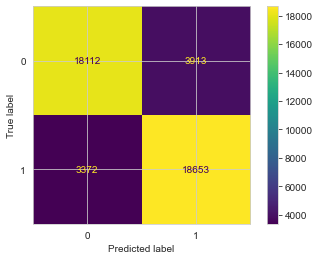

In [142]:
# Visualizing Confusion Matrix for Train Data

metrics.plot_confusion_matrix(lr_model, X_train_final_pca, y_train_smote)
plt.show()

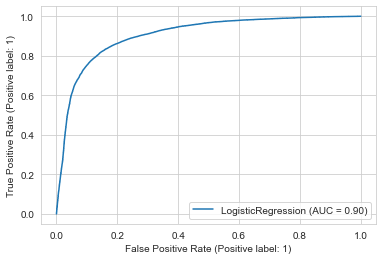

In [143]:
# Plotting the ROC_AUC Curve for Train Data

metrics.plot_roc_curve(lr_model, X_train_final_pca, y_train_smote)
plt.show()

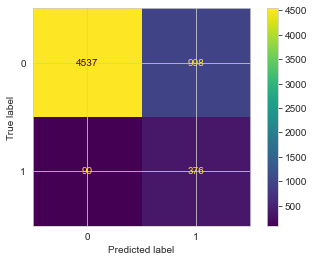

In [144]:
# Visualizing Confusion Matrix for Test Data

metrics.plot_confusion_matrix(lr_model, X_test_final_pca, y_test)
plt.show()

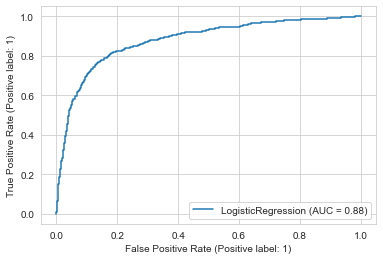

In [145]:
# Plotting the ROC_AUC Curve for Test Data

metrics.plot_roc_curve(lr_model, X_test_final_pca, y_test)
plt.show()

### 2. Decision Tree

In [146]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [147]:
dt.fit(X_train_final_pca, y_train_smote)
cv_score = cross_val_score(dt, X_train_final_pca, y_train_smote, cv = 3, scoring = 'roc_auc' )
print("Mean Cross Validation score for logistic regression: {}".format(np.round(np.mean(cv_score),2)))

Mean Cross Validation score for logistic regression: 0.88


In [148]:
print('AUC on train data by Decision Tree =', metrics.roc_auc_score(y_true=y_train_smote,
                                                               y_score=dt.predict_proba(X_train_final_pca)[:, 1]))

AUC on train data by Decision Tree = 1.0


In [149]:
print('AUC on test data by Decision Tree =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=dt.predict_proba(X_test_final_pca)[:, 1]))

AUC on test data by Decision Tree = 0.6863585610105029


In [150]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [151]:
dt_model = DecisionTreeClassifier()

In [152]:
# Predictions on Train Set using the best estimator

dt_model_cv = DecisionTreeClassifier(criterion = 'gini', 
                                      max_depth = 16, 
                                      min_samples_leaf = 5)

dt_model_cv.fit(X_train_final_pca, y_train_smote)

y_pred_train = dt_model_cv.predict(X_train_final_pca)
y_score_train = dt_model_cv.predict_proba(X_train_final_pca)

In [153]:
# Model Evaluation on Train Set

train_evaluation_score_2 = performance_evaluation_train_data('Decision Tree SMOTE', y_train_smote, y_pred_train, y_score_train[:,1])

The training precision score of the Decision Tree SMOTE is 0.95
The training recall score of the Decision Tree SMOTE is 0.96
The training f1 score of the Decision Tree SMOTE is 0.95
The training roc auc score of the Decision Tree SMOTE is 0.99


In [154]:
# Predictions on Test Set

y_pred_test = dt_model_cv.predict(X_test_final_pca)
y_score_test = dt_model_cv.predict_proba(X_test_final_pca)

In [155]:
# Model Evaluation on Test Set

test_evaluation_score_2 = performance_evaluation_test_data('Decision Tree SMOTE', y_test, y_pred_test, y_score_test[:,1])

The training precision score of the Decision Tree SMOTE is 0.27
The training recall score of the Decision Tree SMOTE is 0.57
The training f1 score of the Decision Tree SMOTE is 0.37
The training roc auc score of the Decision Tree SMOTE is 0.75


In [156]:
evaluation_score_train = evaluation_score_train.append(train_evaluation_score_2)
evaluation_score_train = evaluation_score_train.reset_index(drop = True) 
evaluation_score_train

,Model_Train,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression SMOTE,0.83,0.85,0.84,0.90
1,Decision Tree SMOTE,0.95,0.96,0.95,0.99


In [157]:
evaluation_score_test = evaluation_score_test.append(test_evaluation_score_2)
evaluation_score_test = evaluation_score_test.reset_index(drop = True)
evaluation_score_test

,Model_Test,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression SMOTE,0.27,0.81,0.41,0.88
1,Decision Tree SMOTE,0.27,0.57,0.37,0.75


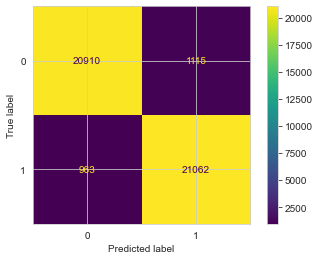

In [158]:
# Visualizing Confusion Matrix for Train Data

metrics.plot_confusion_matrix(dt_model_cv, X_train_final_pca, y_train_smote)
plt.show()

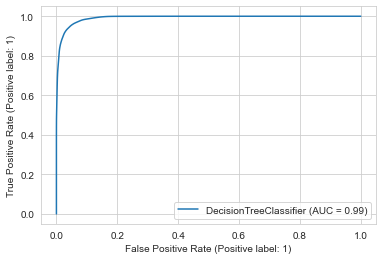

In [159]:
# Plotting the ROC_AUC Curve for Train Data

metrics.plot_roc_curve(dt_model_cv, X_train_final_pca, y_train_smote)
plt.show()

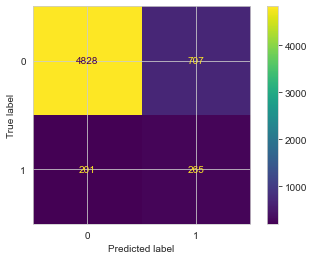

In [160]:
# Visualizing Confusion Matrix for Test Data

metrics.plot_confusion_matrix(dt_model_cv, X_test_final_pca, y_test)
plt.show()

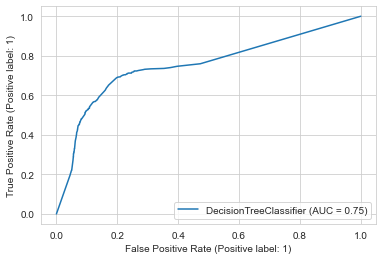

In [161]:
# Plotting the ROC_AUC Curve for Test Data

metrics.plot_roc_curve(dt_model_cv, X_test_final_pca, y_test)
plt.show()

### 3. Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
rf = RandomForestClassifier()
rf.fit(X_train_final_pca, y_train_smote)
cv_score = cross_val_score(rf, X_train_final_pca, y_train_smote, cv = 3, scoring = 'roc_auc' )
print("Mean Cross Validation score for Random Forest: {}".format(np.round(np.mean(cv_score),2)))

Mean Cross Validation score for Random Forest: 0.98


In [164]:
print('AUC on train data by Random Forest =', metrics.roc_auc_score(y_true=y_train_smote,
                                                               y_score=rf.predict_proba(X_train_final_pca)[:, 1]))

AUC on train data by Random Forest = 1.0


In [165]:
print('AUC on test data by Random Forest =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=rf.predict_proba(X_test_final_pca)[:, 1]))

AUC on test data by Random Forest = 0.8680003566845397


In [166]:
# Predictions on Train Set using the best estimator

rf_model_cv = RandomForestClassifier(max_depth = 20, 
                                     max_features = 4, 
                                     min_samples_leaf = 5, 
                                     n_estimators = 200)

rf_model_cv.fit(X_train_final_pca, y_train_smote)

y_pred_train = rf_model_cv.predict(X_train_final_pca)
y_score_train = rf_model_cv.predict_proba(X_train_final_pca)

In [167]:
# Model Evaluation on Train Set

train_evaluation_score_3 = performance_evaluation_train_data('Random Forest SMOTE', y_train_smote, y_pred_train, y_score_train[:,1])

The training precision score of the Random Forest SMOTE is 0.97
The training recall score of the Random Forest SMOTE is 0.98
The training f1 score of the Random Forest SMOTE is 0.98
The training roc auc score of the Random Forest SMOTE is 1.0


In [168]:
# Predictions on Test Set

y_pred_test = rf_model_cv.predict(X_test_final_pca)
y_score_test = rf_model_cv.predict_proba(X_test_final_pca)

In [169]:
# Model Evaluation on Test Set

test_evaluation_score_3 = performance_evaluation_test_data('Random Forest SMOTE', y_test, y_pred_test, y_score_test[:,1])

The training precision score of the Random Forest SMOTE is 0.42
The training recall score of the Random Forest SMOTE is 0.64
The training f1 score of the Random Forest SMOTE is 0.51
The training roc auc score of the Random Forest SMOTE is 0.87


In [170]:
evaluation_score_train = evaluation_score_train.append(train_evaluation_score_3)
evaluation_score_train = evaluation_score_train.reset_index(drop = True) 
evaluation_score_train

,Model_Train,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression SMOTE,0.83,0.85,0.84,0.90
1,Decision Tree SMOTE,0.95,0.96,0.95,0.99
2,Random Forest SMOTE,0.97,0.98,0.98,1.00


In [171]:
evaluation_score_test = evaluation_score_test.append(test_evaluation_score_3)
evaluation_score_test = evaluation_score_test.reset_index(drop = True)
evaluation_score_test

,Model_Test,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression SMOTE,0.27,0.81,0.41,0.88
1,Decision Tree SMOTE,0.27,0.57,0.37,0.75
2,Random Forest SMOTE,0.42,0.64,0.51,0.87


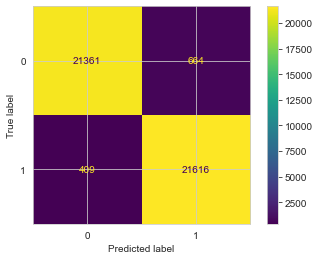

In [172]:
# Visualizing Confusion Matrix for Train Data

metrics.plot_confusion_matrix(rf_model_cv, X_train_final_pca, y_train_smote)
plt.show()

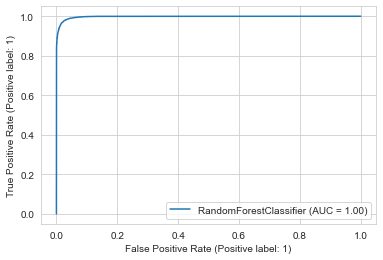

In [173]:
# Plotting the ROC_AUC Curve for Train Data

metrics.plot_roc_curve(rf_model_cv, X_train_final_pca, y_train_smote)
plt.show()

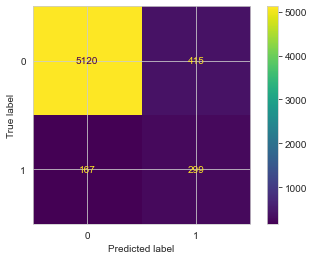

In [174]:
# Visualizing Confusion Matrix for Test Data

metrics.plot_confusion_matrix(rf_model_cv, X_test_final_pca, y_test)
plt.show()

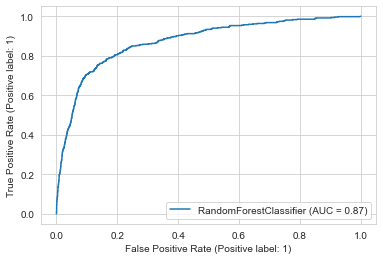

In [175]:
# Plotting the ROC_AUC Curve for Test Data

metrics.plot_roc_curve(rf_model_cv, X_test_final_pca, y_test)
plt.show()

### 4. Gradient Boosting

In [176]:
from sklearn.ensemble import GradientBoostingClassifier

In [177]:
gbclf = GradientBoostingClassifier()
gbclf.fit(X_train_final_pca, y_train_smote)

GradientBoostingClassifier()

In [178]:
print('AUC on train data by Gradient Boosting =', metrics.roc_auc_score(y_true=y_train_smote,
                                                               y_score=gbclf.predict_proba(X_train_final_pca)[:, 1]))

AUC on train data by Gradient Boosting = 0.946927131870836


In [179]:
print('AUC on test data by Gradient Boosting =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=gbclf.predict_proba(X_test_final_pca)[:, 1]))

AUC on test data by Gradient Boosting = 0.8709234252571425


In [180]:
# Predictions on Train Set using the best estimator

gb_model_cv = GradientBoostingClassifier(learning_rate = 0.2,
                                 max_depth = 9,
                                 n_estimators = 200)

gb_model_cv.fit(X_train_final_pca, y_train_smote)

GradientBoostingClassifier(learning_rate=0.2, max_depth=9, n_estimators=200)

In [181]:
# Predictions on Train Set

y_pred_train = gb_model_cv.predict(X_train_final_pca)
y_score_train = gb_model_cv.predict_proba(X_train_final_pca)

In [182]:
# Model Evaluation on Train Set

train_evaluation_score_4 = performance_evaluation_train_data('Gradient Boosting SMOTE', y_train_smote, y_pred_train, y_score_train[:,1])

The training precision score of the Gradient Boosting SMOTE is 1.0
The training recall score of the Gradient Boosting SMOTE is 1.0
The training f1 score of the Gradient Boosting SMOTE is 1.0
The training roc auc score of the Gradient Boosting SMOTE is 1.0


In [183]:
# Predictions on Test Set

y_pred_test = gb_model_cv.predict(X_test_final_pca)
y_score_test = gb_model_cv.predict_proba(X_test_final_pca)

In [184]:
# Model Evaluation on Test Set

test_evaluation_score_4 = performance_evaluation_test_data('Gradient Boosting SMOTE', y_test, y_pred_test, y_score_test[:,1])

The training precision score of the Gradient Boosting SMOTE is 0.44
The training recall score of the Gradient Boosting SMOTE is 0.56
The training f1 score of the Gradient Boosting SMOTE is 0.49
The training roc auc score of the Gradient Boosting SMOTE is 0.86


In [185]:
evaluation_score_train = evaluation_score_train.append(train_evaluation_score_4)
evaluation_score_train = evaluation_score_train.reset_index(drop = True) 
evaluation_score_train

,Model_Train,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression SMOTE,0.83,0.85,0.84,0.90
1,Decision Tree SMOTE,0.95,0.96,0.95,0.99
2,Random Forest SMOTE,0.97,0.98,0.98,1.00
3,Gradient Boosting SMOTE,1.00,1.00,1.00,1.00


In [186]:
evaluation_score_test = evaluation_score_test.append(test_evaluation_score_4)
evaluation_score_test = evaluation_score_test.reset_index(drop = True)
evaluation_score_test

,Model_Test,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression SMOTE,0.27,0.81,0.41,0.88
1,Decision Tree SMOTE,0.27,0.57,0.37,0.75
2,Random Forest SMOTE,0.42,0.64,0.51,0.87
3,Gradient Boosting SMOTE,0.44,0.56,0.49,0.86


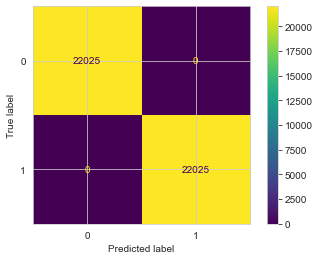

In [187]:
# Visualizing Confusion Matrix for Train Data

metrics.plot_confusion_matrix(gb_model_cv, X_train_final_pca, y_train_smote)
plt.show()

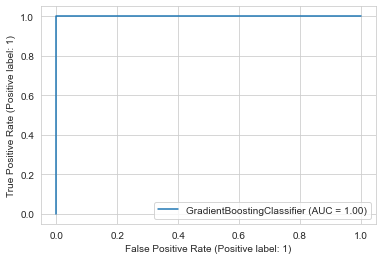

In [188]:
# Plotting the ROC_AUC Curve for Train Data

metrics.plot_roc_curve(gb_model_cv, X_train_final_pca, y_train_smote)
plt.show()

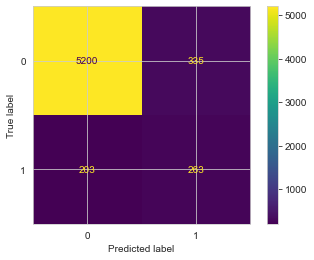

In [189]:
# Visualizing Confusion Matrix for Test Data

metrics.plot_confusion_matrix(gb_model_cv, X_test_final_pca, y_test)
plt.show()

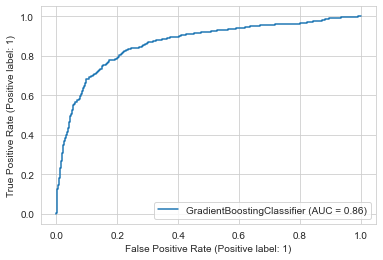

In [190]:
# Plotting the ROC_AUC Curve for Test Data

metrics.plot_roc_curve(gb_model_cv, X_test_final_pca, y_test)
plt.show()

### 5. Xtreme Gradient Boosting

In [191]:
import xgboost as xgb

In [192]:
xgclf = xgb.XGBClassifier()
xgclf.fit(X_train_final_pca, y_train_smote)

[22:33:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [193]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train_smote,
                                                               y_score=xgclf.predict_proba(X_train_final_pca)[:, 1]))

AUC on train data by XGBoost = 0.9940899828772639


In [194]:
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xgclf.predict_proba(X_test_final_pca)[:, 1]))

AUC on test data by XGBoost = 0.863926011220055


In [195]:
# Predictions on Train Set using the best estimator

xgb_model_cv = xgb.XGBRFClassifier(learning_rate =  0.1, 
                                    max_depth = 9, 
                                    min_child_weight = 1, 
                                    n_estimators = 200)

xgb_model_cv.fit(X_train_final_pca, y_train_smote)


y_pred_train = xgb_model_cv.predict(X_train_final_pca)
y_score_train = xgb_model_cv.predict_proba(X_train_final_pca)

[22:33:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [196]:
# Model Evaluation on Train Set

train_evaluation_score_5 = performance_evaluation_train_data('XGBoosting SMOTE', y_train_smote, y_pred_train, y_score_train[:,1])

The training precision score of the XGBoosting SMOTE is 0.91
The training recall score of the XGBoosting SMOTE is 0.92
The training f1 score of the XGBoosting SMOTE is 0.92
The training roc auc score of the XGBoosting SMOTE is 0.97


In [197]:
# Predictions on Test Set

y_pred_test = xgb_model_cv.predict(X_test_final_pca)
y_score_test = xgb_model_cv.predict_proba(X_test_final_pca)

In [198]:
# Model Evaluation on Test Set

test_evaluation_score_5 = performance_evaluation_test_data('XGBoosting SMOTE', y_test, y_pred_test, y_score_test[:,1])

The training precision score of the XGBoosting SMOTE is 0.33
The training recall score of the XGBoosting SMOTE is 0.64
The training f1 score of the XGBoosting SMOTE is 0.43
The training roc auc score of the XGBoosting SMOTE is 0.86


In [199]:
evaluation_score_train = evaluation_score_train.append(train_evaluation_score_5)
evaluation_score_train = evaluation_score_train.reset_index(drop = True) 
evaluation_score_train

,Model_Train,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression SMOTE,0.83,0.85,0.84,0.90
1,Decision Tree SMOTE,0.95,0.96,0.95,0.99
2,Random Forest SMOTE,0.97,0.98,0.98,1.00
3,Gradient Boosting SMOTE,1.00,1.00,1.00,1.00
4,XGBoosting SMOTE,0.91,0.92,0.92,0.97


In [200]:
evaluation_score_test = evaluation_score_test.append(test_evaluation_score_5)
evaluation_score_test = evaluation_score_test.reset_index(drop = True)
evaluation_score_test

,Model_Test,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression SMOTE,0.27,0.81,0.41,0.88
1,Decision Tree SMOTE,0.27,0.57,0.37,0.75
2,Random Forest SMOTE,0.42,0.64,0.51,0.87
3,Gradient Boosting SMOTE,0.44,0.56,0.49,0.86
4,XGBoosting SMOTE,0.33,0.64,0.43,0.86


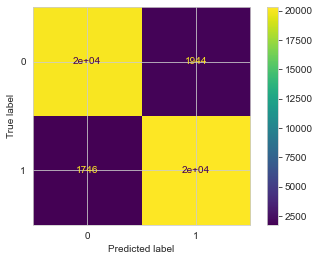

In [201]:
# Visualizing Confusion Matrix for Train Data

metrics.plot_confusion_matrix(xgb_model_cv, X_train_final_pca, y_train_smote)
plt.show()

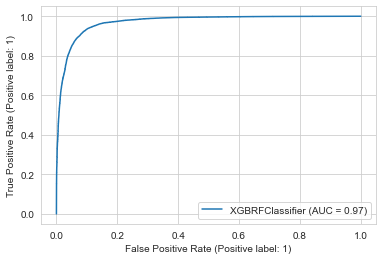

In [202]:
# Plotting the ROC_AUC Curve for Train Data

metrics.plot_roc_curve(xgb_model_cv, X_train_final_pca, y_train_smote)
plt.show()

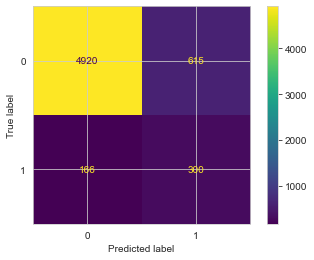

In [203]:
# Visualizing Confusion Matrix for Test Data

metrics.plot_confusion_matrix(xgb_model_cv, X_test_final_pca, y_test)
plt.show()

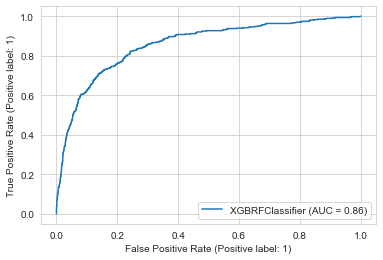

In [204]:
# Plotting the ROC_AUC Curve for Test Data

metrics.plot_roc_curve(xgb_model_cv, X_test_final_pca, y_test)
plt.show()

### Model Building with Class_Weight Method

### Scaling

In [205]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled_temp = scaler.fit_transform(X_train_2)
X_train_scaled = pd.DataFrame(X_train_scaled_temp,columns=X_train_2.columns)

In [206]:
X_train_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,diff_arpu,diff_total_og_mou,diff_total_ic_mou,diff_total_rech_num,diff_total_rech_amt,diff_max_rech_amt,diff_total_rech_data,diff_max_rech_data,diff_av_rech_amt_data,diff_vol_2g_mb,diff_vol_3g_mb
0,0.085036,0.063441,0.022656,0.003461,0.007242,0.005251,0.002776,0.003955,0.004243,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.004190,0.007848,0.005368,0.003296,0.008018,0.010618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006684,0.012330,0.010305,0.000000,0.000123,0.000000,0.000000,0.000181,0.000205,0.005934,0.0,0.007506,0.000497,0.000245,0.000482,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.005905,0.008562,0.007963,0.017024,0.009866,0.018400,0.014579,0.015014,0.012542,0.000000,0.000000,0.000113,0.019146,0.018396,0.024512,0.000496,0.00147,0.000297,0.002929,0.001890,0.006073,0.000000,0.006065,0.002122,0.002982,0.003260,0.006470,0.020618,0.018939,0.028128,0.004049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016287,0.036232,0.015306,0.012845,0.009223,0.011297,0.062843,0.062843,0.056642,0.029925,0.029925,0.056642,0.016393,0.018519,0.018182,0.162058,0.162058,0.162058,0.033395,0.057732,0.062054,0.000010,0.002179,0.001920,0.025701,0.028216,0.030197,0.0,0.0,0.021195,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.071429,0.0625,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.071963,0.042920,0.019544,0.001502,0.0,0.317743,0.309807,0.469831,0.523381,0.331071,0.497263,0.523381,0.490772,0.658887,0.371382,0.469298
1,0.092443,0.066911,0.019352,0.003659,0.000077,0.000021,0.057687,0.006032,0.007647,0.024603,0.000304,0.00786,0.046053,0.021678,0.000883,0.000000,0.000000,0.000000,0.020976,0.000000,0.006940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016123,0.000000,0.003377,0.003612,0.000000,0.000026,0.025032,0.000000,0.004909,0.000000,0.0,0.000000,0.025017,0.000000,0.004913,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.037750,0.000000,0.007344,0.000000,0.000000,0.000000,0.007033,0.000000,0.0042

In [207]:
X_test_scaled_temp = scaler.transform(X_test_2)
X_test_scaled = pd.DataFrame(X_test_scaled_temp,columns=X_test_2.columns)

In [208]:
X_test_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,diff_arpu,diff_total_og_mou,diff_total_ic_mou,diff_total_rech_num,diff_total_rech_amt,diff_max_rech_amt,diff_total_rech_data,diff_max_rech_data,diff_av_rech_amt_data,diff_vol_2g_mb,diff_vol_3g_mb
0,0.092409,0.073450,0.036539,0.004906,0.007853,0.005453,0.062382,0.038961,0.021791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005696,0.006818,0.005574,0.091557,0.080320,0.056324,0.000259,0.002959,0.008304,0.0,0.008847,0.000000,0.076080,0.054730,0.033499,0.000201,0.001671,0.0,0.000140,0.000216,0.001295,0.0,0.0,0.0,0.000317,0.001427,0.001292,0.0,0.0,0.0,0.001740,0.005815,0.001299,0.002230,0.0,0.0,0.062349,0.038981,0.025699,0.013155,0.007363,0.003994,0.046197,0.063270,0.036591,0.007734,0.007216,0.007529,0.038532,0.049529,0.036721,0.000286,0.002731,0.003465,0.004052,0.001472,0.005691,0.003575,0.0,0.001061,0.004608,0.003107,0.008148,0.040488,0.045851,0.040621,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.022801,0.086957,0.045918,0.015715,0.020826,0.023455,0.031920,0.038404,0.102270,0.031920,0.012469,0.032367,0.000000,0.018519,0.018182,0.000000,0.099035,0.292605,0.000000,0.035281,0.112041,0.000000,0.005901,0.000240,0.000000,0.002644,0.054925,1.0,0.0,0.021195,0.00,0.2,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0625,0.000000,0.0,0.0,1.0,0.0,0.0,0.738710,0.037420,0.009789,0.032310,0.08775,0.327084,0.302312,0.454374,0.528777,0.343586,0.538892,0.528777,0.633145,0.730322,0.368943,0.533749
1,0.082423,0.060167,0.010184,0.000000,0.000000,0.000000,0.000198,0.000940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000617,0.000000,0.000000,0.000000,0.000000,0.0,0.004406,0.000000,0.000000,0.000366,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.001349,0.004985,0.000000,0.000000,0.0,0.0,0.000182,0.000803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000028,0.000000,0.000000,0.000000,0.0000

In [209]:
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_6,24000.0,0.093999,0.015808,0.0,0.085664,0.091408,0.098692,1.0
arpu_7,24000.0,0.069291,0.013380,0.0,0.062500,0.067082,0.072967,1.0
arpu_8,24000.0,0.025207,0.015322,0.0,0.017026,0.022782,0.029687,1.0
onnet_mou_6,24000.0,0.035200,0.062179,0.0,0.002306,0.011380,0.039160,1.0
onnet_mou_7,24000.0,0.032663,0.058639,0.0,0.001942,0.010049,0.035477,1.0
onnet_mou_8,24000.0,0.023297,0.045349,0.0,0.001035,0.006486,0.024032,1.0
offnet_mou_6,24000.0,0.053635,0.069097,0.0,0.010298,0.031923,0.070009,1.0
offnet_mou_7,24000.0,0.039079,0.051907,0.0,0.007198,0.022833,0.050914,1.0
offnet_mou_8,24000.0,0.023935,0.034606,0.0,0.003338,0.013112,0.031361,1.0
roam_ic_mou_6,24000.0,0.006271,0.029331,0.0,0.000000,0.000000,0.000000,1.0


In [210]:
X_test_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_6,6001.0,0.093699,0.013420,0.007252,0.085605,0.091280,0.098469,0.318194
arpu_7,6001.0,0.069288,0.010837,0.030060,0.062647,0.067392,0.073114,0.247941
arpu_8,6001.0,0.025134,0.012568,-0.017725,0.016952,0.022886,0.029791,0.192960
onnet_mou_6,6001.0,0.035966,0.062835,0.000000,0.002374,0.011811,0.040103,0.894946
onnet_mou_7,6001.0,0.033496,0.059633,0.000000,0.002032,0.010672,0.036277,0.908459
onnet_mou_8,6001.0,0.024133,0.048270,0.000000,0.001075,0.006945,0.024179,1.077691
offnet_mou_6,6001.0,0.053823,0.070128,0.000000,0.010175,0.032127,0.070369,1.201064
offnet_mou_7,6001.0,0.039246,0.050412,0.000000,0.007302,0.022490,0.051809,0.608985
offnet_mou_8,6001.0,0.023869,0.033644,0.000000,0.003323,0.012733,0.031218,0.507046
roam_ic_mou_6,6001.0,0.006028,0.030025,0.000000,0.000000,0.000000,0.000000,1.009355


### PCA

In [211]:
from sklearn.decomposition import PCA

In [212]:
pca = PCA(random_state = 42)

X_train_pca = pca.fit(X_train_scaled)

In [213]:
X_train_pca.components_

array([[ 2.74054375e-03,  1.96935349e-03,  1.26956134e-03, ...,
         3.69639252e-04,  7.86169507e-04, -6.11562488e-04],
       [-1.02916098e-04,  3.08885959e-03,  5.80401282e-03, ...,
         2.68600429e-02,  1.06908712e-02,  1.25991553e-02],
       [ 4.03789916e-03, -1.42352877e-03,  1.93504777e-03, ...,
         1.21797840e-02,  3.48013692e-03,  5.00965088e-03],
       ...,
       [ 0.00000000e+00,  9.51642302e-17, -4.02828912e-17, ...,
         1.77342987e-02,  6.55142818e-03,  1.26593963e-02],
       [-0.00000000e+00, -3.87566322e-16,  2.77949243e-16, ...,
        -5.10851970e-02,  3.33474262e-03, -7.94696792e-03],
       [ 3.29960830e-01,  4.08849200e-01, -7.45717690e-01, ...,
         3.60822483e-16, -1.24900090e-16,  1.38777878e-16]])

In [214]:
X_train_pca_components = pd.DataFrame(X_train_pca.components_)

In [215]:
X_train_pca_components.shape

(151, 151)

In [216]:
X_train_pca.explained_variance_ratio_

array([6.28989399e-01, 1.19444501e-01, 9.13462054e-02, 3.30821224e-02,
       1.73361201e-02, 1.32812226e-02, 1.16260556e-02, 8.72602414e-03,
       6.77355326e-03, 5.40330146e-03, 4.92038847e-03, 4.44202162e-03,
       3.43621043e-03, 2.96319186e-03, 2.62896688e-03, 2.37622747e-03,
       2.17268774e-03, 2.12489854e-03, 1.99380568e-03, 1.83244484e-03,
       1.75458610e-03, 1.68854093e-03, 1.59023830e-03, 1.52387587e-03,
       1.47055364e-03, 1.38339155e-03, 1.29777111e-03, 1.23659076e-03,
       1.17871950e-03, 1.09806120e-03, 1.00493084e-03, 9.62838364e-04,
       9.29972664e-04, 8.51804204e-04, 7.89572400e-04, 7.75490496e-04,
       7.18881062e-04, 6.83432978e-04, 6.55899350e-04, 6.04649653e-04,
       5.88436461e-04, 5.67714641e-04, 5.39716628e-04, 4.97323928e-04,
       4.52068996e-04, 4.25092780e-04, 3.95790356e-04, 3.75849557e-04,
       3.71737381e-04, 3.58383729e-04, 3.51509681e-04, 3.46661299e-04,
       3.26189452e-04, 3.17731783e-04, 3.09950815e-04, 2.90774736e-04,
      

In [217]:
var_cumu = np.cumsum(X_train_pca.explained_variance_ratio_)

#Convert explained variance to DataFrame
var_cumu_df = pd.DataFrame({"Cumulative Variance":var_cumu}) 
var_cumu_df.head(30)

,Cumulative Variance
0,0.628989
1,0.748434
2,0.839780
3,0.872862
4,0.890198
5,0.903480
6,0.915106
7,0.923832
8,0.930605
9,0.936009


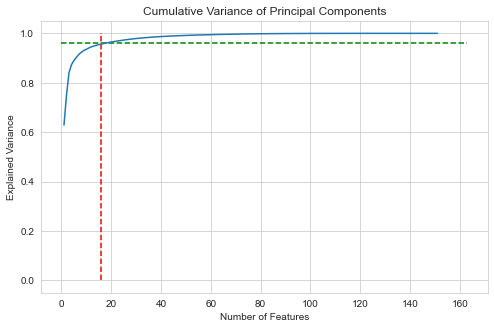

In [218]:
# Making the Scree Plot

plt.figure(figsize = (8,5))
plt.plot(range(1, len(var_cumu)+1), var_cumu)
plt.hlines(y = 0.96, xmax=163, xmin=0, color = 'g', linestyle = '--')
plt.vlines(x = 16, ymax=1, ymin=0, color = 'r', linestyle = '--')
plt.title("Cumulative Variance of Principal Components")
plt.ylabel("Explained Variance")
plt.xlabel("Number of Features")
plt.show()

In [219]:
# Let's figure out number of components explaining 96% of variance via code

pca_ncomp = PCA(0.96,random_state= 42)
X_train_pca_ncomp = pca_ncomp.fit_transform(X_train_scaled)
print("Number of principal components explaining 96% of variance:{}".format(X_train_pca_ncomp.shape[1]))

Number of principal components explaining 96% of variance:18


In [220]:
# Running final PCA with 18 components

final_pca = PCA(n_components = 18)

# Running Final PCA on Scaled X Train
X_train_final_pca = final_pca.fit_transform(X_train_scaled)

In [221]:
# Checking shape of train after PCA
print(X_train_final_pca.shape)

(24000, 18)


In [222]:
# Checking correlation post PCA

corrmat = np.corrcoef(X_train_final_pca.transpose())

In [223]:
corrmat.shape

(18, 18)

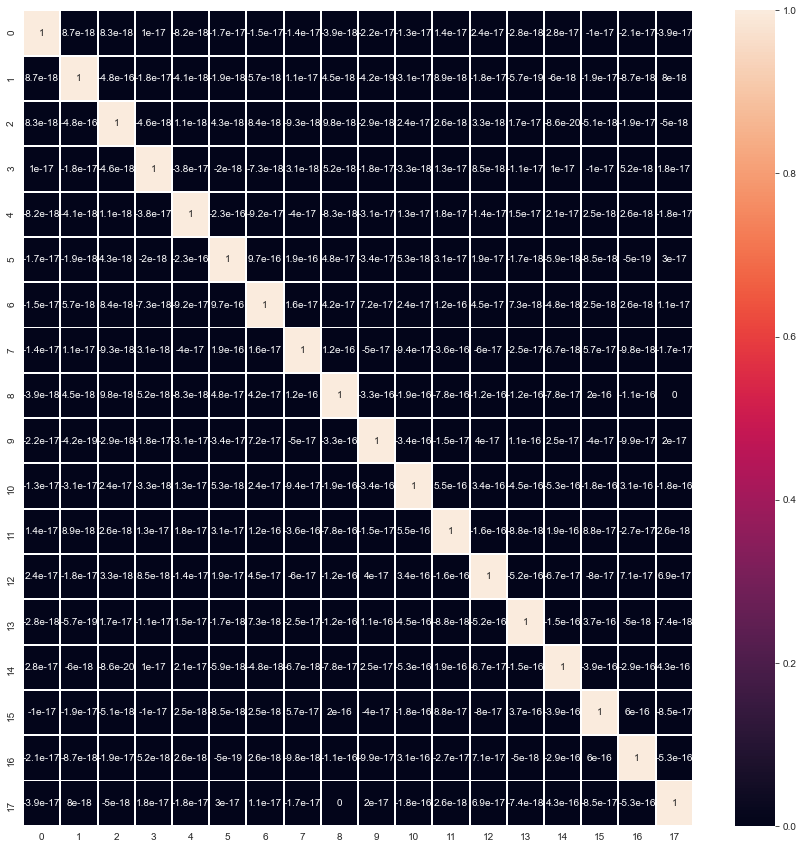

In [224]:
# Plotting the heatmap of the corr matrix

plt.figure(figsize = (15,15))
sns.heatmap(corrmat, annot = True, linewidth = 1)
plt.show()

In [225]:
# From the above operation, we have taken care of multi-collinearity

In [226]:
# Running Final PCA on Scaled X Test

X_test_final_pca = final_pca.transform(X_test_scaled)

In [227]:
# Checking shape of test datasets after PCA

print(X_test_final_pca.shape)

(6001, 18)


### Model Building

- We will be making use of the following models:
 - Logistic Regression
 - Decision Tree
 - Random Forest
 - Gradient Boosting
 - XGBoost

### 1. Logistic Regression

In [228]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(class_weight = 'balanced')
lr_model.fit(X_train_final_pca, y_train_2)
cv_score = cross_val_score(lr_model, X_train_final_pca, y_train_2, cv = 3, scoring = 'roc_auc' )
print("Mean Cross Validation score for logistic regression: {}".format(np.round(np.mean(cv_score),2)))

Mean Cross Validation score for logistic regression: 0.86


In [229]:
# Predictions on Train Set

y_pred_train = lr_model.predict(X_train_final_pca)
y_score_train = lr_model.predict_proba(X_train_final_pca)

In [230]:
# Model Evaluation on Train Set

train_evaluation_score_6 = performance_evaluation_train_data('Logistic Regression CW Method', y_train_2, y_pred_train, y_score_train[:,1])

The training precision score of the Logistic Regression CW Method is 0.24
The training recall score of the Logistic Regression CW Method is 0.8
The training f1 score of the Logistic Regression CW Method is 0.37
The training roc auc score of the Logistic Regression CW Method is 0.86


In [231]:
# Predictions on Test Set

y_pred_test = lr_model.predict(X_test_final_pca)
y_score_test = lr_model.predict_proba(X_test_final_pca)

In [232]:
# Model Evaluation on Test Set

test_evaluation_score_6 = performance_evaluation_test_data('Logistic Regression CW Method', y_test_2, y_pred_test, y_score_test[:,1])

The training precision score of the Logistic Regression CW Method is 0.22
The training recall score of the Logistic Regression CW Method is 0.78
The training f1 score of the Logistic Regression CW Method is 0.34
The training roc auc score of the Logistic Regression CW Method is 0.86


In [233]:
evaluation_score_train = evaluation_score_train.append(train_evaluation_score_6)
evaluation_score_train = evaluation_score_train.reset_index(drop = True)
evaluation_score_train

,Model_Train,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression SMOTE,0.83,0.85,0.84,0.90
1,Decision Tree SMOTE,0.95,0.96,0.95,0.99
2,Random Forest SMOTE,0.97,0.98,0.98,1.00
3,Gradient Boosting SMOTE,1.00,1.00,1.00,1.00
4,XGBoosting SMOTE,0.91,0.92,0.92,0.97
5,Logistic Regression CW Method,0.24,0.80,0.37,0.86


In [234]:
evaluation_score_test = evaluation_score_test.append(test_evaluation_score_6)
evaluation_score_test = evaluation_score_test.reset_index(drop = True)
evaluation_score_test

,Model_Test,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression SMOTE,0.27,0.81,0.41,0.88
1,Decision Tree SMOTE,0.27,0.57,0.37,0.75
2,Random Forest SMOTE,0.42,0.64,0.51,0.87
3,Gradient Boosting SMOTE,0.44,0.56,0.49,0.86
4,XGBoosting SMOTE,0.33,0.64,0.43,0.86
5,Logistic Regression CW Method,0.22,0.78,0.34,0.86


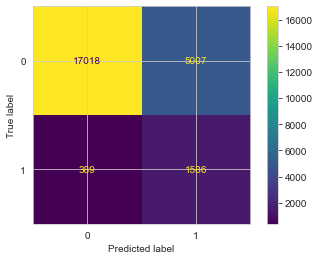

In [235]:
# Visualizing Confusion Matrix for Train Data

metrics.plot_confusion_matrix(lr_model, X_train_final_pca, y_train_2)
plt.show()

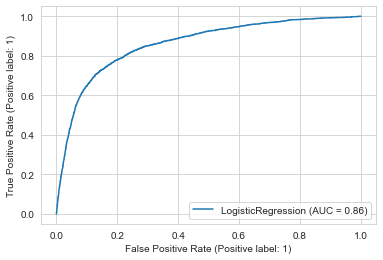

In [236]:
# Plotting the ROC_AUC Curve for train Data

metrics.plot_roc_curve(lr_model, X_train_final_pca, y_train_2)
plt.show()

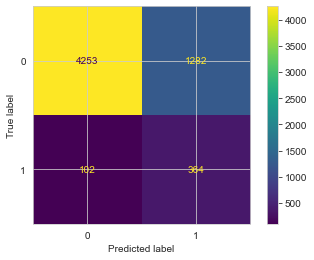

In [237]:
# Visualizing Confusion Matrix for Test Data

metrics.plot_confusion_matrix(lr_model, X_test_final_pca, y_test_2)
plt.show()

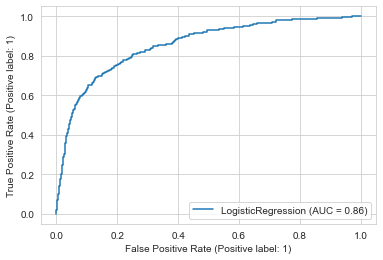

In [238]:
# Plotting the ROC_AUC Curve for Test Data

metrics.plot_roc_curve(lr_model, X_test_final_pca, y_test_2)
plt.show()

### 2. Decision Tree

In [239]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight = 'balanced')

In [240]:
dt.fit(X_train_final_pca, y_train_2)
cv_score = cross_val_score(dt, X_train_final_pca, y_train_2, cv = 3, scoring = 'roc_auc' )
print("Mean Cross Validation score for logistic regression: {}".format(np.round(np.mean(cv_score),2)))

Mean Cross Validation score for logistic regression: 0.64


In [241]:
print('AUC on train data by Decision Tree =', metrics.roc_auc_score(y_true=y_train_2,
                                                               y_score=dt.predict_proba(X_train_final_pca)[:, 1]))

AUC on train data by Decision Tree = 1.0


In [242]:
print('AUC on test data by Decision Tree =', metrics.roc_auc_score(y_true=y_test_2,
                                                             y_score=dt.predict_proba(X_test_final_pca)[:, 1]))

AUC on test data by Decision Tree = 0.6427668640062653


In [243]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [244]:
dt_model = DecisionTreeClassifier(class_weight = 'balanced')

In [245]:
# Predictions on Train Set

dt_model_cv = DecisionTreeClassifier(class_weight = 'balanced',
                                     criterion = 'gini', 
                                     max_depth = 18, 
                                     min_samples_leaf = 5)

dt_model_cv.fit(X_train_final_pca, y_train_2)

y_pred_train = dt_model_cv.predict(X_train_final_pca)
y_score_train = dt_model_cv.predict_proba(X_train_final_pca)

In [246]:
# Model Evaluation on Train Set

train_evaluation_score_7 = performance_evaluation_train_data('Decision Tree CW Method', y_train_2, y_pred_train, y_score_train[:,1])

The training precision score of the Decision Tree CW Method is 0.53
The training recall score of the Decision Tree CW Method is 1.0
The training f1 score of the Decision Tree CW Method is 0.69
The training roc auc score of the Decision Tree CW Method is 0.99


In [247]:
# Predictions on Test Set

y_pred_test = dt_model_cv.predict(X_test_final_pca)
y_score_test = dt_model_cv.predict_proba(X_test_final_pca)

In [248]:
# Model Evaluation on Test Set

test_evaluation_score_7 = performance_evaluation_test_data('Decision Tree CW Method', y_test_2, y_pred_test, y_score_test[:,1])

The training precision score of the Decision Tree CW Method is 0.27
The training recall score of the Decision Tree CW Method is 0.55
The training f1 score of the Decision Tree CW Method is 0.37
The training roc auc score of the Decision Tree CW Method is 0.72


In [249]:
evaluation_score_train = evaluation_score_train.append(train_evaluation_score_7)
evaluation_score_train = evaluation_score_train.reset_index(drop = True)
evaluation_score_train

,Model_Train,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression SMOTE,0.83,0.85,0.84,0.90
1,Decision Tree SMOTE,0.95,0.96,0.95,0.99
2,Random Forest SMOTE,0.97,0.98,0.98,1.00
3,Gradient Boosting SMOTE,1.00,1.00,1.00,1.00
4,XGBoosting SMOTE,0.91,0.92,0.92,0.97
5,Logistic Regression CW Method,0.24,0.80,0.37,0.86
6,Decision Tree CW Method,0.53,1.00,0.69,0.99


In [250]:
evaluation_score_test = evaluation_score_test.append(test_evaluation_score_7)
evaluation_score_test = evaluation_score_test.reset_index(drop = True)
evaluation_score_test

,Model_Test,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression SMOTE,0.27,0.81,0.41,0.88
1,Decision Tree SMOTE,0.27,0.57,0.37,0.75
2,Random Forest SMOTE,0.42,0.64,0.51,0.87
3,Gradient Boosting SMOTE,0.44,0.56,0.49,0.86
4,XGBoosting SMOTE,0.33,0.64,0.43,0.86
5,Logistic Regression CW Method,0.22,0.78,0.34,0.86
6,Decision Tree CW Method,0.27,0.55,0.37,0.72


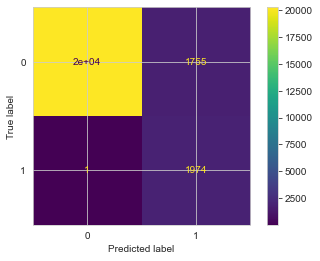

In [251]:
# Visualizing Confusion Matrix for Train Data

metrics.plot_confusion_matrix(dt_model_cv, X_train_final_pca, y_train_2)
plt.show()

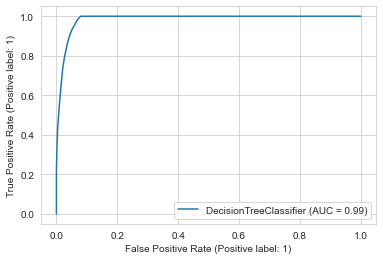

In [252]:
# Plotting the ROC_AUC Curve for Train Data

metrics.plot_roc_curve(dt_model_cv, X_train_final_pca, y_train_2)
plt.show()

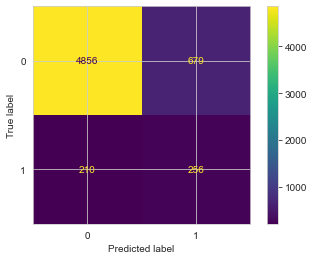

In [253]:
# Visualizing Confusion Matrix for Test Data

metrics.plot_confusion_matrix(dt_model_cv, X_test_final_pca, y_test_2)
plt.show()

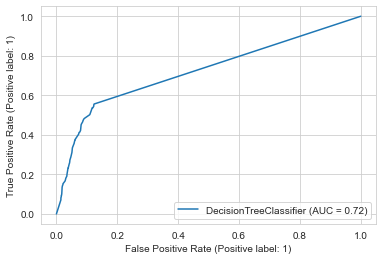

In [254]:
# Plotting the ROC_AUC Curve for Test Data

metrics.plot_roc_curve(dt_model_cv, X_test_final_pca, y_test_2)
plt.show()

### 3. Random Forest

In [255]:
from sklearn.ensemble import RandomForestClassifier

In [256]:
rf = RandomForestClassifier(class_weight = 'balanced')
rf.fit(X_train_final_pca, y_train_2)
cv_score = cross_val_score(rf, X_train_final_pca, y_train_2, cv = 3, scoring = 'roc_auc' )
print("Mean Cross Validation score for Random Forest: {}".format(np.round(np.mean(cv_score),2)))

Mean Cross Validation score for Random Forest: 0.87


In [257]:
print('AUC on train data by Random Forest =', metrics.roc_auc_score(y_true=y_train_2,
                                                               y_score=rf.predict_proba(X_train_final_pca)[:, 1]))

AUC on train data by Random Forest = 1.0


In [258]:
print('AUC on test data by Random Forest =', metrics.roc_auc_score(y_true=y_test_2,
                                                             y_score=rf.predict_proba(X_test_final_pca)[:, 1]))

AUC on test data by Random Forest = 0.8656097948676197


In [259]:
# Predictions on Train Set

rf_model_cv = RandomForestClassifier(class_weight = 'balanced',
                                     max_depth = 20, 
                                     max_features = 2, 
                                     min_samples_leaf = 5, 
                                     n_estimators = 200)

rf_model_cv.fit(X_train_final_pca, y_train_2)


y_pred_train = rf_model_cv.predict(X_train_final_pca)
y_score_train = rf_model_cv.predict_proba(X_train_final_pca)

In [260]:
# Model Evaluation on Train Set

train_evaluation_score_8 = performance_evaluation_train_data('Random Forest CW Method', y_train_2, y_pred_train, y_score_train[:,1])

The training precision score of the Random Forest CW Method is 0.78
The training recall score of the Random Forest CW Method is 0.97
The training f1 score of the Random Forest CW Method is 0.87
The training roc auc score of the Random Forest CW Method is 0.99


In [261]:
# Predictions on Test Set

y_pred_test = rf_model_cv.predict(X_test_final_pca)
y_score_test = rf_model_cv.predict_proba(X_test_final_pca)

In [262]:
# Model Evaluation on Test Set

test_evaluation_score_8 = performance_evaluation_test_data('Random Forest CW Method', y_test_2, y_pred_test, y_score_test[:,1])

The training precision score of the Random Forest CW Method is 0.5
The training recall score of the Random Forest CW Method is 0.49
The training f1 score of the Random Forest CW Method is 0.49
The training roc auc score of the Random Forest CW Method is 0.87


In [263]:
evaluation_score_train = evaluation_score_train.append(train_evaluation_score_8)
evaluation_score_train = evaluation_score_train.reset_index(drop = True)
evaluation_score_train

,Model_Train,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression SMOTE,0.83,0.85,0.84,0.90
1,Decision Tree SMOTE,0.95,0.96,0.95,0.99
2,Random Forest SMOTE,0.97,0.98,0.98,1.00
3,Gradient Boosting SMOTE,1.00,1.00,1.00,1.00
4,XGBoosting SMOTE,0.91,0.92,0.92,0.97
5,Logistic Regression CW Method,0.24,0.80,0.37,0.86
6,Decision Tree CW Method,0.53,1.00,0.69,0.99
7,Random Forest CW Method,0.78,0.97,0.87,0.99


In [264]:
evaluation_score_test = evaluation_score_test.append(test_evaluation_score_8)
evaluation_score_test = evaluation_score_test.reset_index(drop = True)
evaluation_score_test

,Model_Test,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression SMOTE,0.27,0.81,0.41,0.88
1,Decision Tree SMOTE,0.27,0.57,0.37,0.75
2,Random Forest SMOTE,0.42,0.64,0.51,0.87
3,Gradient Boosting SMOTE,0.44,0.56,0.49,0.86
4,XGBoosting SMOTE,0.33,0.64,0.43,0.86
5,Logistic Regression CW Method,0.22,0.78,0.34,0.86
6,Decision Tree CW Method,0.27,0.55,0.37,0.72
7,Random Forest CW Method,0.50,0.49,0.49,0.87


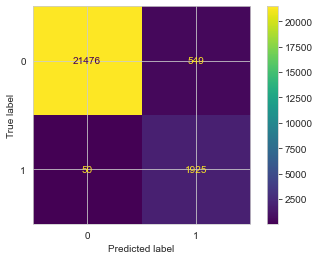

In [265]:
# Visualizing Confusion Matrix for Train Data

metrics.plot_confusion_matrix(rf_model_cv, X_train_final_pca, y_train_2)
plt.show()

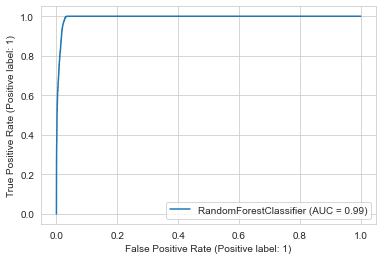

In [266]:
# Plotting the ROC_AUC Curve for Train Data

metrics.plot_roc_curve(rf_model_cv, X_train_final_pca, y_train_2)
plt.show()

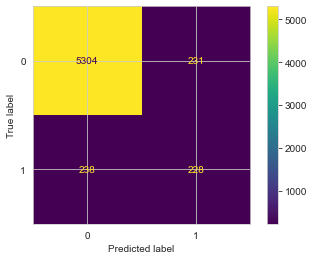

In [267]:
# Visualizing Confusion Matrix for Test Data

metrics.plot_confusion_matrix(rf_model_cv, X_test_final_pca, y_test_2)
plt.show()

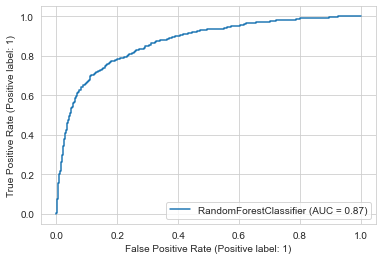

In [268]:
# Plotting the ROC_AUC Curve for Test Data

metrics.plot_roc_curve(rf_model_cv, X_test_final_pca, y_test_2)
plt.show()

### 4. Gradient Boosting

In [269]:
from sklearn.ensemble import GradientBoostingClassifier

In [270]:
gbclf = GradientBoostingClassifier()
gbclf.fit(X_train_final_pca, y_train_2)

GradientBoostingClassifier()

In [271]:
print('AUC on train data by Gradient Boosting =', metrics.roc_auc_score(y_true=y_train_2,
                                                               y_score=gbclf.predict_proba(X_train_final_pca)[:, 1]))

AUC on train data by Gradient Boosting = 0.9034112903921033


In [272]:
print('AUC on test data by Gradient Boosting =', metrics.roc_auc_score(y_true=y_test_2,
                                                             y_score=gbclf.predict_proba(X_test_final_pca)[:, 1]))

AUC on test data by Gradient Boosting = 0.8672340664751427


In [273]:
gb_model_cv = GradientBoostingClassifier(learning_rate = 0.1,
                                         max_depth = 4,
                                         n_estimators = 100)

gb_model_cv.fit(X_train_final_pca, y_train_2)

GradientBoostingClassifier(max_depth=4)

In [274]:
# Predictions on Train Set

y_pred_train = gb_model_cv.predict(X_train_final_pca)
y_score_train = gb_model_cv.predict_proba(X_train_final_pca)

In [275]:
# Model Evaluation on Train Set

train_evaluation_score_9 = performance_evaluation_train_data('Gradient Boosting N/ CW Method', y_train_2, y_pred_train, y_score_train[:,1])

The training precision score of the Gradient Boosting N/ CW Method is 0.79
The training recall score of the Gradient Boosting N/ CW Method is 0.42
The training f1 score of the Gradient Boosting N/ CW Method is 0.55
The training roc auc score of the Gradient Boosting N/ CW Method is 0.93


In [276]:
# Predictions on Test Set

y_pred_test = gb_model_cv.predict(X_test_final_pca)
y_score_test = gb_model_cv.predict_proba(X_test_final_pca)

In [277]:
# Model Evaluation on Test Set

test_evaluation_score_9 = performance_evaluation_test_data('Gradient Boosting N/ CW Method', y_test_2, y_pred_test, y_score_test[:,1])

The training precision score of the Gradient Boosting N/ CW Method is 0.62
The training recall score of the Gradient Boosting N/ CW Method is 0.32
The training f1 score of the Gradient Boosting N/ CW Method is 0.42
The training roc auc score of the Gradient Boosting N/ CW Method is 0.87


In [278]:
evaluation_score_train = evaluation_score_train.append(train_evaluation_score_9)
evaluation_score_train = evaluation_score_train.reset_index(drop = True)
evaluation_score_train

,Model_Train,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression SMOTE,0.83,0.85,0.84,0.90
1,Decision Tree SMOTE,0.95,0.96,0.95,0.99
2,Random Forest SMOTE,0.97,0.98,0.98,1.00
3,Gradient Boosting SMOTE,1.00,1.00,1.00,1.00
4,XGBoosting SMOTE,0.91,0.92,0.92,0.97
5,Logistic Regression CW Method,0.24,0.80,0.37,0.86
6,Decision Tree CW Method,0.53,1.00,0.69,0.99
7,Random Forest CW Method,0.78,0.97,0.87,0.99
8,Gradient Boosting N/ CW Method,0.79,0.42,0.55,0.93


In [279]:
evaluation_score_test = evaluation_score_test.append(test_evaluation_score_9)
evaluation_score_test = evaluation_score_test.reset_index(drop = True)
evaluation_score_test

,Model_Test,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression SMOTE,0.27,0.81,0.41,0.88
1,Decision Tree SMOTE,0.27,0.57,0.37,0.75
2,Random Forest SMOTE,0.42,0.64,0.51,0.87
3,Gradient Boosting SMOTE,0.44,0.56,0.49,0.86
4,XGBoosting SMOTE,0.33,0.64,0.43,0.86
5,Logistic Regression CW Method,0.22,0.78,0.34,0.86
6,Decision Tree CW Method,0.27,0.55,0.37,0.72
7,Random Forest CW Method,0.50,0.49,0.49,0.87
8,Gradient Boosting N/ CW Method,0.62,0.32,0.42,0.87


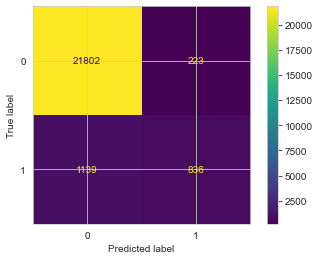

In [280]:
# Visualizing Confusion Matrix for Train Data

metrics.plot_confusion_matrix(gb_model_cv, X_train_final_pca, y_train_2)
plt.show()

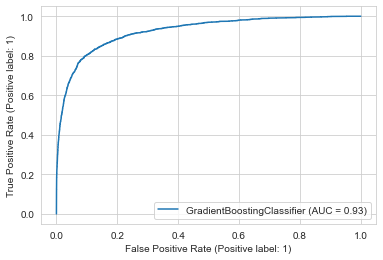

In [281]:
# Plotting the ROC_AUC Curve for Train Data

metrics.plot_roc_curve(gb_model_cv, X_train_final_pca, y_train_2)
plt.show()

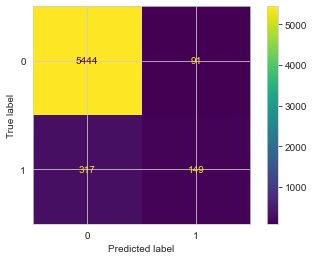

In [282]:
# Visualizing Confusion Matrix for Test Data

metrics.plot_confusion_matrix(gb_model_cv, X_test_final_pca, y_test_2)
plt.show()

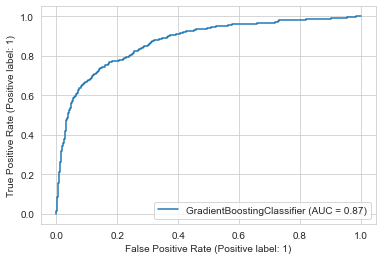

In [283]:
# Plotting the ROC_AUC Curve for Test Data

metrics.plot_roc_curve(gb_model_cv, X_test_final_pca, y_test_2)
plt.show()

### 5. Xtreme Gradient Boosting

In [284]:
import xgboost as xgb

In [285]:
xgclf = xgb.XGBClassifier(class_weight = 'balanced')
xgclf.fit(X_train_final_pca, y_train_2)

[22:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [286]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train_2,
                                                               y_score=xgclf.predict_proba(X_train_final_pca)[:, 1]))

AUC on train data by XGBoost = 0.9957185361858648


In [287]:
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test_2,
                                                             y_score=xgclf.predict_proba(X_test_final_pca)[:, 1]))

AUC on test data by XGBoost = 0.8587835506395122


In [288]:
# Predictions on Train Set

xgb_model_cv = xgb.XGBRFClassifier(class_weight = 'balanced',
                                   learning_rate = 0.1, 
                                   max_depth = 9,
                                   min_child_weight = 6, 
                                   n_estimators = 200)

xgb_model_cv.fit(X_train_final_pca, y_train_2)

y_pred_train = xgb_model_cv.predict(X_train_final_pca)
y_score_train = xgb_model_cv.predict_proba(X_train_final_pca)

[22:34:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:34:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [289]:
# Model Evaluation on Train Set

train_evaluation_score_10 = performance_evaluation_train_data('XGBoosting CW Method', y_train_2, y_pred_train, y_score_train[:,1])

The training precision score of the XGBoosting CW Method is 0.81
The training recall score of the XGBoosting CW Method is 0.33
The training f1 score of the XGBoosting CW Method is 0.47
The training roc auc score of the XGBoosting CW Method is 0.93


In [290]:
# Predictions on Test Set

y_pred_test = xgb_model_cv.predict(X_test_final_pca)
y_score_test = xgb_model_cv.predict_proba(X_test_final_pca)

In [291]:
# Model Evaluation on Test Set

test_evaluation_score_10 = performance_evaluation_test_data('XGBoosting CW Method', y_test_2, y_pred_test, y_score_test[:,1])

The training precision score of the XGBoosting CW Method is 0.63
The training recall score of the XGBoosting CW Method is 0.22
The training f1 score of the XGBoosting CW Method is 0.33
The training roc auc score of the XGBoosting CW Method is 0.87


In [292]:
evaluation_score_train = evaluation_score_train.append(train_evaluation_score_10)
evaluation_score_train = evaluation_score_train.reset_index(drop = True)
evaluation_score_train

,Model_Train,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression SMOTE,0.83,0.85,0.84,0.90
1,Decision Tree SMOTE,0.95,0.96,0.95,0.99
2,Random Forest SMOTE,0.97,0.98,0.98,1.00
3,Gradient Boosting SMOTE,1.00,1.00,1.00,1.00
4,XGBoosting SMOTE,0.91,0.92,0.92,0.97
5,Logistic Regression CW Method,0.24,0.80,0.37,0.86
6,Decision Tree CW Method,0.53,1.00,0.69,0.99
7,Random Forest CW Method,0.78,0.97,0.87,0.99
8,Gradient Boosting N/ CW Method,0.79,0.42,0.55,0.93
9,XGBoosting CW Method,0.81,0.33,0.47,0.93


In [293]:
evaluation_score_test = evaluation_score_test.append(test_evaluation_score_10)
evaluation_score_test = evaluation_score_test.reset_index(drop = True)
evaluation_score_test

,Model_Test,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression SMOTE,0.27,0.81,0.41,0.88
1,Decision Tree SMOTE,0.27,0.57,0.37,0.75
2,Random Forest SMOTE,0.42,0.64,0.51,0.87
3,Gradient Boosting SMOTE,0.44,0.56,0.49,0.86
4,XGBoosting SMOTE,0.33,0.64,0.43,0.86
5,Logistic Regression CW Method,0.22,0.78,0.34,0.86
6,Decision Tree CW Method,0.27,0.55,0.37,0.72
7,Random Forest CW Method,0.50,0.49,0.49,0.87
8,Gradient Boosting N/ CW Method,0.62,0.32,0.42,0.87
9,XGBoosting CW Method,0.63,0.22,0.33,0.87


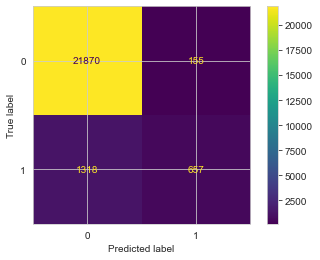

In [294]:
# Visualizing Confusion Matrix for Train Data

metrics.plot_confusion_matrix(xgb_model_cv, X_train_final_pca, y_train_2)
plt.show()

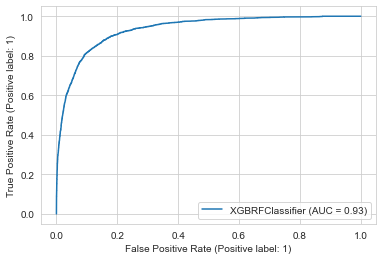

In [295]:
# Plotting the ROC_AUC Curve for Train Data

metrics.plot_roc_curve(xgb_model_cv, X_train_final_pca, y_train_2)
plt.show()

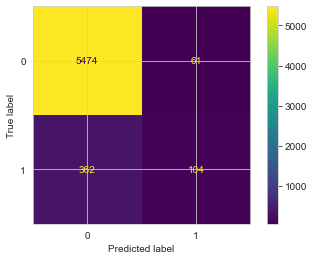

In [296]:
# Visualizing Confusion Matrix for Test Data

metrics.plot_confusion_matrix(xgb_model_cv, X_test_final_pca, y_test_2)
plt.show()

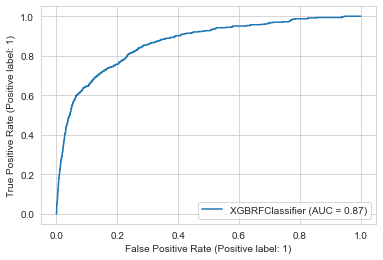

In [297]:
# Plotting the ROC_AUC Curve for Test Data

metrics.plot_roc_curve(xgb_model_cv, X_test_final_pca, y_test_2)
plt.show()

### Feature Importance and Model Interpretation

In [298]:
# We'll find the feature importance using Random Forest

rf_2 = RandomForestClassifier()
rf_2.fit(X_train_smote, y_train_smote)
cv_score = cross_val_score(rf_2, X_train_smote, y_train_smote, cv = 3, scoring = 'roc_auc' )
print("Mean Cross Validation score for Random Forest: {}".format(np.round(np.mean(cv_score),2)))

Mean Cross Validation score for Random Forest: 0.99


In [299]:
print('AUC on train data by Random Forest =', metrics.roc_auc_score(y_true=y_train_smote,
                                                               y_score=rf_2.predict_proba(X_train_smote)[:, 1]))

AUC on train data by Random Forest = 1.0


In [300]:
print('AUC on test data by Random Forest =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=rf.predict_proba(X_test_final_pca)[:, 1]))

AUC on test data by Random Forest = 0.8656097948676197


In [301]:
# Creating a Feature Importance DataFrame

rf_2.feature_importances_

array([0.00380484, 0.00377191, 0.03504486, 0.00290548, 0.00332957,
       0.00748916, 0.00345227, 0.00348956, 0.00529071, 0.00252247,
       0.00287407, 0.04302437, 0.00221219, 0.00632702, 0.03844345,
       0.00281709, 0.00305318, 0.00876089, 0.0034313 , 0.0034983 ,
       0.02742215, 0.00185251, 0.00198313, 0.00290021, 0.00169704,
       0.0025721 , 0.00170983, 0.00357455, 0.0032447 , 0.02211792,
       0.00379837, 0.00380149, 0.00301994, 0.00279755, 0.00347992,
       0.00353192, 0.00080081, 0.0012621 , 0.00056058, 0.00342981,
       0.00464764, 0.00447705, 0.00123204, 0.00187592, 0.00137067,
       0.00279692, 0.00476716, 0.00279953, 0.00236444, 0.00020759,
       0.00015942, 0.00332413, 0.00355745, 0.01886962, 0.00309577,
       0.00343961, 0.03080475, 0.00362192, 0.0035358 , 0.03650945,
       0.00237508, 0.00232963, 0.00295666, 0.00373614, 0.00373454,
       0.05489998, 0.00335765, 0.00342338, 0.00191342, 0.00282359,
       0.00299903, 0.00358689, 0.00120147, 0.00150229, 0.00111

In [302]:
# Let's look at top 20 features

feature_importance = pd.DataFrame({'Features': X_train_smote.columns, 'Feature_Importance':rf_2.feature_importances_})
feature_importance = feature_importance.sort_values(by = 'Feature_Importance', ascending = False) 
feature_importance = feature_importance.reset_index(drop = True) 
feature_importance = feature_importance.iloc[:20, :] 

In [303]:
feature_importance

,Features,Feature_Importance
0,loc_ic_mou_8,0.054900
1,roam_ic_mou_8,0.043024
2,night_pck_user_8,0.042582
3,total_ic_mou_8,0.039004
4,roam_og_mou_8,0.038443
5,loc_ic_t2m_mou_8,0.036509
6,arpu_8,0.035045
7,loc_ic_t2t_mou_8,0.030805
8,fb_user_8,0.028300
9,loc_og_t2m_mou_8,0.027422


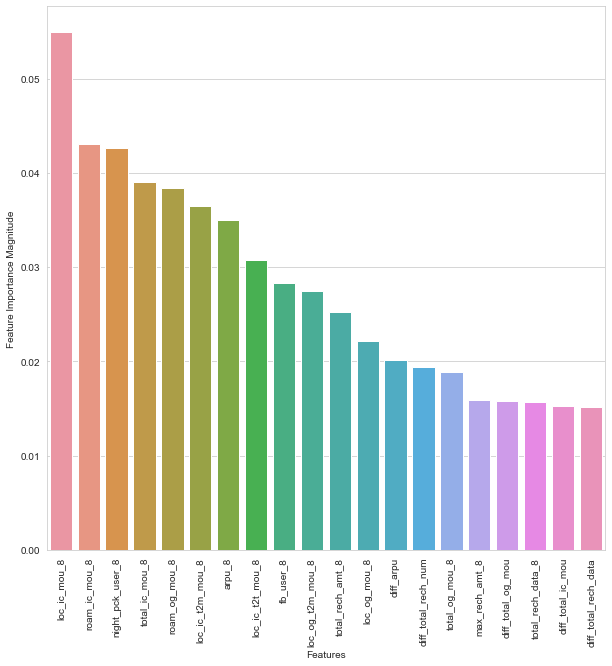

In [304]:
# Let's plot features to understand relative importance

plt.figure(figsize = (10,10))
sns.barplot(x = 'Features', y = 'Feature_Importance', data = feature_importance)
plt.ylabel('Feature Importance Magnitude')
plt.xticks(rotation = 90)
plt.show()

### Conclusion